# Introduction to Quantum Circuits and Digital Quantum Simulation
## MSc in Quantum Technologies

# Introduction
Recall the learning goals (see lab script for detail):
1. Install and configure Qiskit and IBM Quantum Runtime to target simulators and hardware;
2. explain and visulize single and multi qubit states (Bloch/Q-sphere), gates, and measurements;
3. build and analyze basic quantum protocols (Deutsch/Jozsa, teleportation, superdense coding);
4. assemble NISQ-appropriate workflows for quantum simulation

# Syllabus and pacing:
1. Quantum Computing Fundamentals
2. Basic Quantum Protocols
3. Quantum Simulation
4. Assignment

Each of the above section will take about (or more) than 10 hours.

# 1. Quantum Computing Fundamentals
## 2025/10/21
Aim of this week is to finish section 1.

## 1.a Install and IBM Cloud API

Following the guide with Qiskit (https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit), the latest version of qiskit and qiskit-ibm-runtime are installed to Python virtual environment.

In [ ]:
# install virtual environment
python3 -m venv .venv

# install all relavent packages
pip install qiskit
pip install qiskit-ibm-runtime
pip install qiskit[visualization]
pip install qiskit_aer
pip install jupyter

To use the virtual environment, enter the following code to the cmd terminal in VS code.

In [ ]:
# Using the virtual environment
.venv\Scripts\activate

In addition, the jupyter notebook installed in this device seems to have some issue, which means the usual activation command may not work properly. So, if fail to open jupyter notebook, try the 2nd command below.

In [ ]:
# Usual command for jupyter notebook
jupyter notebook

# Provide root to jupyter notebook
sudo jupyter notebook --allow-root

With the above intro, we should be able to use qiskit or any relavent code in this jupyter notebook. As a trail, hello-world.ipynb was downloaded under the same location and environment. Qiskit introduction code was tested there.

## 1.b Quantum Computing Fundamentals
Now, with the above environment, we may start practing creating quantum staes and vectors, superposition and simple two level systems, read histograms and sue Bloch/Q-sphere views to connect math to the pictures you see in qiskit.

## Tutorial 1: Quantum coins and superposition
Step 1: simulate a classical coin
the state of the coin before it lands to reflect this 50/50 probability:

$$
S(coin) =  \frac{1}{2}|up\rangle + \frac{1}{2}|down\rangle
$$

Here, the two terms represent the two possible outcomes of the flip, and their coefficients represent the probabilities of each of the outcomes. Note that typically, the "$|\rangle$" (known as a "ket") is used to represent a quantum state, but here, we are talking about a *classical* probabilistic state.

If we were to flip a coin 1000 times and record the number of heads up and down, we would get something like this:

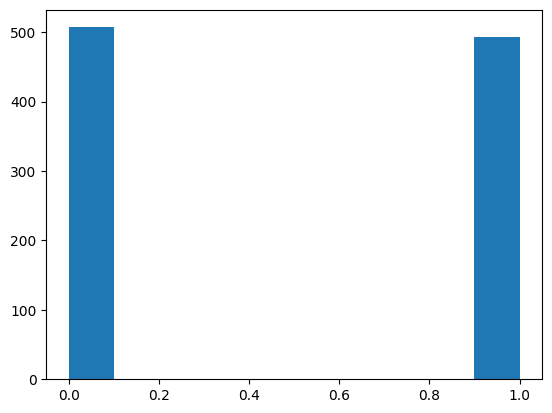

In [3]:
# import necessary packages:
import numpy as np
import matplotlib.pyplot as plt
import random
 
 
nflips = 1000
fliplist = [random.randint(0, 1) for f in range(nflips)]
 
 
# bar plots using get_gaussian_probs function
plt.hist(fliplist)
plt.show()

Step 2: quantum coin
We can create a similar probabilistic state using a qubit on our quantum computer. Like the coin flip, a qubit also can be measured in two possible states: $|0\rangle$ and $|1\rangle$. We create the probabilistic, "superposition" state by starting in the state $|0\rangle$, and then applying something called a Hadamard gate to the qubit. This puts it in an equal superposition of $|0\rangle$ and $|1\rangle$.

So, since the qubit is in an equal superposition of 0 and 1, when we measure the qubit, there will be a 50% chance we measure $|0\rangle$, 50% chance we measure $|1\rangle$. We write this state a little differently from the classical probabilistic case, for reasons that will become clear later:

$$
|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle
$$

Here, the probabilities of measuring each of the two states are **no longer** equal to the coefficients, as was the case in the classical probabilistic state above. Instead, it is the **square** of the coefficients that gives us the probabilities, and each of these coefficients can now be complex, meaning they can have both real and imaginary parts.

Despite these differences, though, the outcome of measuring this state is essentially the same as flipping a coin.

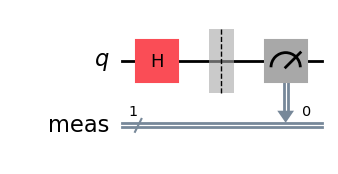

In [4]:
from qiskit import QuantumCircuit

qcoin = QuantumCircuit(1)
qcoin.h(0)
qcoin.measure_all()

qcoin.draw("mpl")

So, in effect, applying the Hadamard gate is the analogue to flipping a coin. And just like we flipped the coin 1000 times to look at the statistics of the coin landing heads up or down, we can do something similar on Qiskit with our “quantum coin." We can use a Qiskit primitive called `Sampler`, which will repeat a circuit several times to sample the statistics of the resulting state.

First, we load the Qiskit Runtime service and primitives, then we select a backend on which to run the circuit.

In [6]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

management.get:WARNING:2025-10-22 11:38:09,659: Loading default saved account


In [7]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import (
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)

# Use the least busy backend
backend = service.least_busy()
print(backend.name)

ibm_torino


Also, while waiting for the queue, we could use the follwoing simulation for small number of qubits

In [8]:
## Use a local simulator

from qiskit_aer import AerSimulator

## Generate a simulator that mimics the real quantum system

backend_sim = AerSimulator.from_backend(backend)

## Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2
sampler_sim = BackendSamplerV2(backend = backend_sim)
from qiskit.primitives import BackendEstimatorV2
estimator_sim = BackendEstimatorV2(backend = backend_sim)

In [9]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin)

In [ ]:
## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

# or with Aer simulator with noise model from real backend
simulated_job = sampler_sim.run([qc_isa])
simulate_counts = simulated_job.result()[0].data.meas.get_counts()

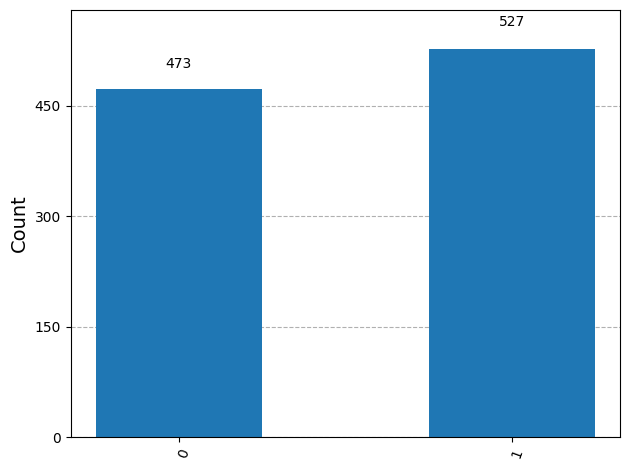

In [22]:
## Analysis
from qiskit.visualization import plot_histogram

# histogram of real hardware
plot_histogram(counts)

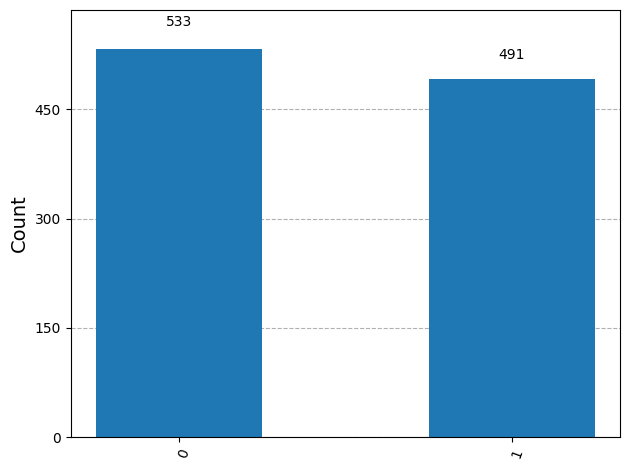

In [23]:
# simulation result
plot_histogram(simulate_counts)

With 1000 samples of the circuit above, we have something that looks basically identical to the classical coin histogram, up to some statistical fluctuation.

In addition to sampling the statistics of the quantum coin, we can also use another Qiskit primitive called `Estimator` to measure the so-called *expectation value* of an *observable* of the state. To illustrate what this expectation value is, let's use the classical coin as an example. Say you're using the coin to gamble: every time you flip the coin and it lands "heads up," you win one dollar. But every time it lands "heads down," you lose one dollar. If you want to know how much money you're expected to get each flip (the expectation value of the observable "money"), then you would calculate:

$$
E(money) = \frac{1}{2} (+ \text{1 dollar}) +  \frac{1}{2} (- \text{1 dollar}) = \text{0 dollars}
$$

Since you're equally likely to win a dollar as you are to lose a dollar, the expectation value is \$0.

Similarly, with a quantum state, we can calculate the expectation value of the observable "Z", where Z is the Pauli matrix with values +1 and -1 associated with the states $|0\rangle$ and $|1\rangle$, respectively.

$$
\langle \psi|Z|\psi \rangle = \frac{1}{2} \langle 0 | Z | 0 \rangle +  \frac{1}{2} \langle 1 | Z | 1 \rangle = \frac{1}{2} (+1) +  \frac{1}{2}(-1) = 0
$$



In [17]:
from qiskit.quantum_info import Pauli

qcoin = QuantumCircuit(1)
qcoin.h(0)

# for Estimator, we do not apply the measurement to the circuit

In [24]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

obs = Pauli("Z")

qc_isa = pm.run(qcoin)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

In [25]:
## Execute

# On real hardware:
estimator = Estimator(mode=backend)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()

# On a simulator:
simulated_job = estimator_sim.run([[qc_isa, obs_isa]])
simulated_res=job.result()

print(res[0].data.evs)

-0.015870916545430498


In [26]:
print(simulated_res[0].data.evs)

-0.015870916545430498


We get an expectation value of 0, as expected (hah). This is another way to confirm that indeed, there is an equal probability of measuring or 0 and 1, and appears to behave like a coin flip.

At this point, the "quantum coin" looks exactly like the classical coin. But in the next section, we'll do some experiments that will reveal the fundamental differences between the two.


## The quantum revealed: an experiment in three dimensions

Let's do a thought experiment: Say you flip a coin in the air, and rather than let it fall to the ground, you have the coordination to clap as it passes between your hands and sandwich the coin between your palms. Now, instead of the coin being either heads up or down, it's heads left or right.

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

    What is the probability of each of these outcomes, heads left or heads right?



Classically, it should be the same

But how would things look different for our quantum coin? Let's check.

We can make our quantum superposition in the same way we did last time, with a Hadamard gate. To measure “heads left or right” on our quantum coin, we can do what we did with the classical coin: measure along a different axis. Our standard measurements on the quantum computer are along the vertical axis, just like the usual “heads up or down” measurement of the classical coin. But we can also ask our quantum coin if it’s heads left or right, or equivalently, if it’s in the states $|+\rangle$ or $|-\rangle$, which are pointing along the $x$-axis. `Sampler` only samples in the measurement basis Z, but we can use `Estimator` to give us the expectation value of X. The values of X are +1 and -1 for the states $|+\rangle$ or $|-\rangle$, respectively.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    If the quantum coin behaved like the classical coin in this case, we would have a 50-50 probability of measuring the state to be in $|+\rangle$ and $|-\rangle$. What expectation value of X would we expect `Estimator` to return, if this were the case?
  </summary>

  **Answer:**

  When we apply X to the $|+\rangle$ state, we get the value and +1 and to the state $|-\rangle$ we get -1, so if we had a 50-50 distribution, we would get an expectation value of 0.
</details>

In [ ]:
# Step 1: map problem

qcoin_lr = QuantumCircuit(1)
qcoin_lr.h(0)

obs = Pauli("X")


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_lr)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

# Step 3: Run the circuit on a real quantum computer

estimator = Estimator(mode=backend)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()

# Run the job on the Aer simulator with noise model from real backend
sim_job = estimator_sim.run([[qc_isa,obs_isa]])
sim_res=sim_job.result()

In [29]:
# Step 4: Return the result in classical form, and analyze.
print(res[0].data.evs)
print(sim_res[0].data.evs)

0.9891135303265941
0.96533203125


The expectation value of X for this state is 1. So, there is **not** a 50-50 probability of measuring $|+\rangle$ and $|-\rangle$.

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    What does this expectation value tell us about the state $|\psi\rangle$? What are the probabilities of measuring $|+\rangle$ and $|-\rangle$ in this X basis?
  </summary>

  **Answer:**

  Since the expectation value is the same as the value of X for the state $|+\rangle$, that means we have 100% probability of measuring the state $|+\rangle$ when we measure along X.
</details>



It means that, the quantum coin we generated, has a different behaviour alone vertical axis than the horizontal axis. Simply speaking, it has a direction in its random states.

### The quantum phase

The key difference of the quantum coin is that it has another quality that the classical coin does not. Remember that in a classical probabilistic state,

$$
S(coin) =  c_1|up\rangle + c_2|down\rangle
$$

each coefficient is simply a real, positive number that represents the probability of measuring a particular state. In a quantum state,

$$
|\psi\rangle = c_1 |0\rangle + c_2 |1\rangle
$$

the coefficients are complex, so they contain a real and an imaginary part. Each coefficient $c_i$ can be expressed as a two-dimensional vector on the complex plane, with magnitude $|c_i|$ and angle $\phi_i$ it makes with the real axis:

$$
c_i = |c_i| e^{i \phi_i}.
$$

We call $\phi_i$ the phase. The phase tells us how two terms in a quantum state will *interfere*, or how they will add or cancel like waves. If two waves are in phase with one another, so their crests and troughs line up, then they will combine to form a wave twice as high. We call this constructive interference. If they are out of phase, meaning a crest from one lines up with trough from the other, and vice-versa, they interfere destructively and completely cancel each other out.

Like waves, quantum states can also add constructively or destructively. It can be trickier to see because often, we are not talking about an actual wave in physical space. In the case of our qubits, the interference happens in abstract, information space of the qubits. Also note that because only the *relative* phase between the two waves matters to how they will interfere - that is, the difference in the phases $\Delta \phi = \phi_2 - \phi_1$ of the two coefficients - we typically apply a *global phase* of $-\phi_1$ to the entire state so that $c_1$ is purely real and the *relative phase* is entirely captured in $c_2$.

like this:

$$
|\psi\rangle = |0\rangle + e^{i \phi}|1\rangle
$$

To see how the phase can cause interference in our quantum coin, let’s try to apply the Hadamard two times instead of just once. Classically, this wouldn’t make any sense – if applying the Hadamard is equivalent to flipping a coin, then you can’t flip a coin that is already flipping. But let's see what happens to the quantum coin:



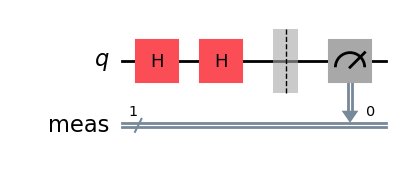

In [31]:
qcoin_0 = QuantumCircuit(1)
qcoin_0.h(0)
qcoin_0.h(0)
qcoin_0.measure_all()

qcoin_0.draw("mpl")

Now, before we use `Sampler` to measure the resulting state, let's think about how this qubit will be transformed by each gate. It starts, as usual, in $|0\rangle$. Then, the first Hadamard transforms the state into the superposition, as we've already seen:

$$
H|0\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle.
$$

In this case, both coefficients are fully real and positive, meaning the phase is $\phi=0$.

The second Hadamard is then applied to each piece of the superposition state separately. We already know how the Hadamard transforms the $|0\rangle$ state. But what about $|1\rangle$?

$$
H|1\rangle = \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle
$$

This is, again, an equal superposition of 0 and 1, akin to flipping a coin, but this state's coefficient in front of $|1\rangle$ has a phase of $\phi = \pi$ to give it the negative sign.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Calculate the resulting state after applying the second Hadamard. That is, calculate: $H(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle)$. Note that $H$ is distributive, so we can apply it to each of the terms individually.
  </summary>

  **Answer:**

  $$
  H(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle) = \frac{1}{\sqrt{2}} H|0\rangle + \frac{1}{\sqrt{2}} H|1\rangle = \frac{1}{2} [(|0\rangle + |1\rangle) + (|0\rangle - |1\rangle)] = |0\rangle
  $$
</details>



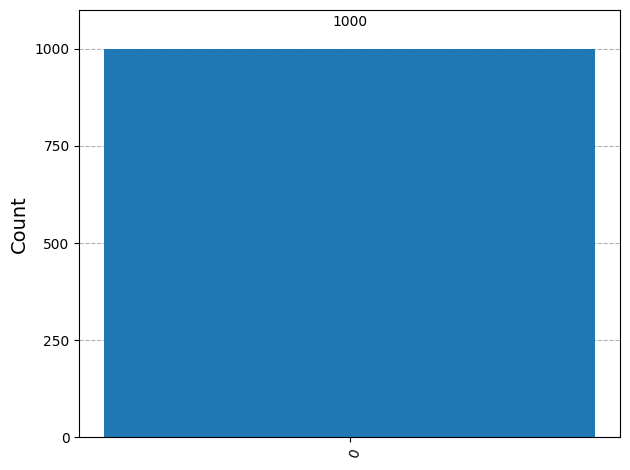

In [32]:
## Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin_0)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)

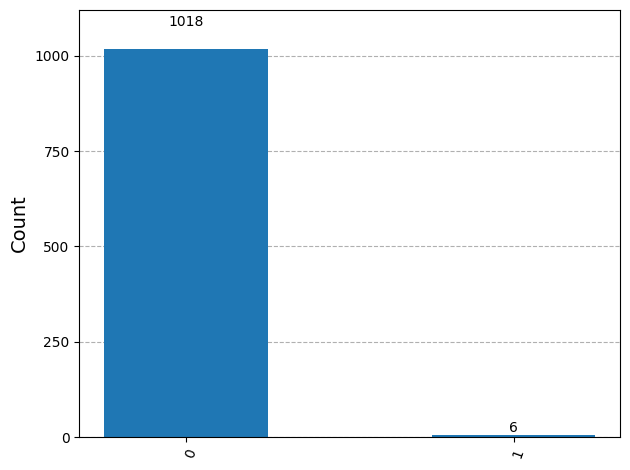

In [33]:
# or with Aer simulator with noise model from real backend
sim_job = sampler_sim.run([qc_isa])
sim_counts=sim_job.result()[0].data.meas.get_counts()

## Analyze
plot_histogram(sim_counts)


The second Hadamard has canceled out the first, and we’ve returned to the 0 state where we started! This is because the Hadamard transforms both the $|0\rangle$ and $|1\rangle$ states to similar states, but with opposite phases. After the second Hadamard, we see that the $|0\rangle$ terms interfere constructively, but the $|1\rangle$ terms interfere destructively and cancel each other out.

Let’s explore further: we can change the phase using a "PHASE” gate. So now let’s apply a Hadamard to create the superposition, apply a phase shift of $\pi$ radians, then apply the second Hadamard:



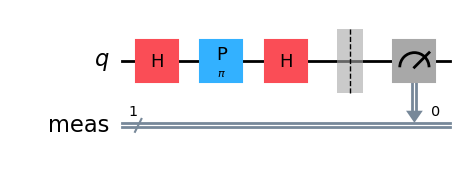

In [34]:
qcoin_pi = QuantumCircuit(1)
qcoin_pi.h(0)
qcoin_pi.p(np.pi, 0)
qcoin_pi.h(0)
qcoin_pi.measure_all()

qcoin_pi.draw("mpl")

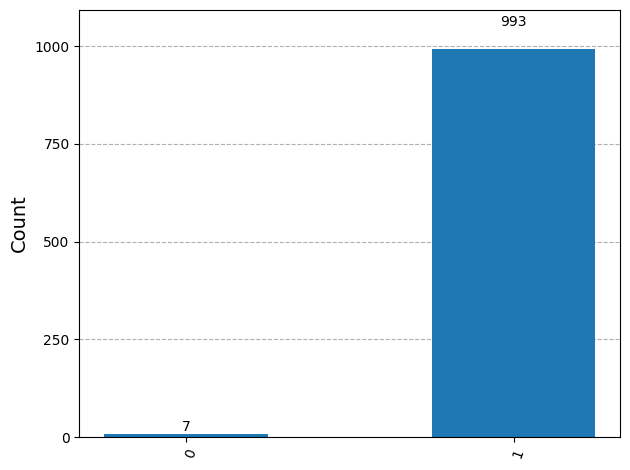

In [35]:
## Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin_pi)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)

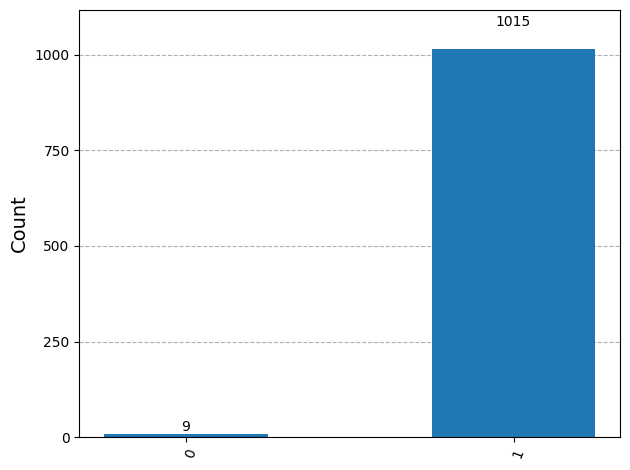

In [37]:
# or with Aer simulator with noise model from real backend
sim_job = sampler_sim.run([qc_isa])
sim_counts=sim_job.result()[0].data.meas.get_counts()
plot_histogram(sim_counts)

## Interesting thing to notice:
in the above simulation, it seems like the total number of trails is more than 1000 (add to 1024). This is because that we simulate 2^10 as a defult value of the simulator.

And now the qubit is measured to be in the 1 state instead of 0.

So, even from these few, simple experiments, you can already see the drastic difference this phase can make on a quantum circuit. It can be subtle and hard to see at first. In our first experiment, where we simply tossed our quantum coin with a Hadamard gate and measured the outcome of the flip revealed nothing of the effect of the phase. It was only when we dug deeper that we discovered the difference a phase can make. It can cause the same quantum gate to have quite literally the opposite effect on a qubit.

#### Try it yourself:

Edit the code cell below to change the phase such that the second Hadamard creates a superposition state with probabilities of 25% and 75% of finding the state in $|0\rangle$ and $|1\rangle$, respectively. Verify your answer with math.



In [38]:
import numpy as np

qcoin_phase = QuantumCircuit(1)
qcoin_phase.h(0)
qcoin_phase.rz(2*np.pi/3, 0)  # Phase = 2π/3 ≈ 2.094 radians
qcoin_phase.h(0)
qcoin_phase.measure_all()

## Transpile
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_phase)

## Execute
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()
counts = res[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)
print(f"Phase angle: {2*np.pi/3:.4f} radians = {120:.1f} degrees")

Phase angle: 2.0944 radians = 120.0 degrees


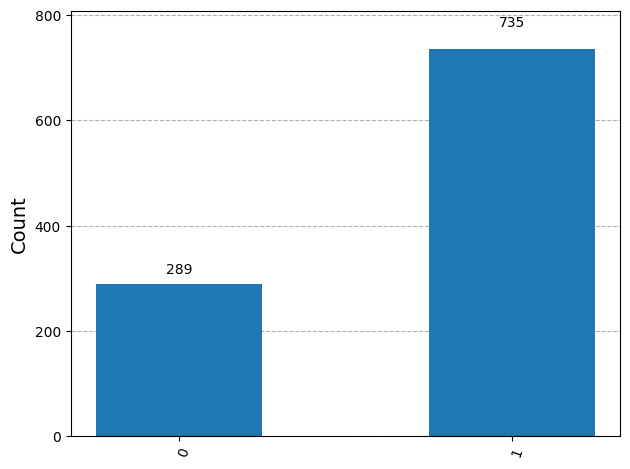

In [39]:
sim_job = sampler_sim.run([qc_isa])
sim_counts=sim_job.result()[0].data.meas.get_counts()
plot_histogram(sim_counts)

## Mathematical Analysis: H-Rz(θ)-H Circuit

**Goal:** Find θ such that P(|0⟩) = 0.25 and P(|1⟩) = 0.75

### State Evolution

1. **Initial state:** $|\psi_0\rangle = |0\rangle$

2. **After first Hadamard:** $|\psi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

3. **After Rz(θ):** $|\psi_2\rangle = \frac{1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle)$

4. **After second Hadamard:** 
   $$|\psi_3\rangle = \frac{1}{2}\left[(1 + e^{i\theta})|0\rangle + (1 - e^{i\theta})|1\rangle\right]$$

### Measurement Probabilities

$$P(0) = \left|\frac{1 + e^{i\theta}}{2}\right|^2 = \frac{1 + \cos\theta}{2}$$

$$P(1) = \left|\frac{1 - e^{i\theta}}{2}\right|^2 = \frac{1 - \cos\theta}{2}$$

### Solving for θ

Set $P(0) = 0.25$:

$$\frac{1 + \cos\theta}{2} = 0.25$$
$$\cos\theta = -0.5$$
$$\theta = \frac{2\pi}{3} \text{ radians} = 120°$$

### Verification

- $P(0) = \frac{1 + (-0.5)}{2} = 0.25$ ✓
- $P(1) = \frac{1 - (-0.5)}{2} = 0.75$ ✓

**Answer:** $\theta = \frac{2\pi}{3} \approx 2.094$ radians = $120°$


## Another (better) coin analogy using the $\sqrt{\text{NOT}}$ gate

By now we've learned that the act of flipping a coin is pretty different from creating a superposition state. Is there a better analogy we could make to a coin that captures more of the superposition-like phenomena? Yes. Yes there is.

We're going to do another thought experiment with a coin. Imagine the coin sitting on the table, heads up. To make it heads down, we can simply flip it over. This is the computational equivalent of a "NOT" gate.

Say we want to construct an operation that, if applied twice, would be equivalent to the NOT gate. That is, we want a "squareroot of NOT," or $\sqrt{\text{NOT}}$. We can do this by considering how the NOT gate is physically implemented on the coin: it's just a rotation of 180 degrees around, for example, the x-axis. So, if we were to rotate the coin just 90 degrees around the x-axis, it would be equivalent to a $\sqrt{\text{NOT}}$ gate.

Imagine that after applying the $\sqrt{\text{NOT}}$ gate, we want to ask whether the coin is heads up or heads down. It's neither - it's standing on its edge relative to the vertical axis. But now, let's redefine our "measurement" of the coin to be first, collapsing the coin along the measurement axis (by squashing it with your hand so that it's lying flat), and second, checking whether it's heads up or down.

If we perform this "measurement" on the coin standing on its edge, then the coin will "collapse" to heads up and heads down with equal probability. Much like the coin flip, in principle, the direction that the coin falls can be predicted based on the initial conditions of the coin and how exactly the force of our hand is applied to the coin to "collapse" it. But in practice, it should be difficult to predict which side will land up, so it is essentially random.

We can actually measure this coin along three different axes: $x$, $y$, and $z$. We see that the coin's edge is pointing along the $x$ and $z$, so measurement in those directions requires "collapsing" the coin - hence, along those axes, there will be random with 50:50 probability of measuring heads up and down. But along the $y$-axis, it's already flat, with its head facing the -y direction. We can call that "heads forward."

So, while the x and z measurements yielded random results, the y measurement will alway yield the same result! If you recall the "quantum coin flip" experiment from the previous section, this is reminiscent to how the quantum coin behaved. It was measured to be 0 or 1  with 50/50 probability in the z-direction, but always $|+\rangle$ and never $|-\rangle$ along X.  **This is suggestive that perhaps a coin sitting still, on its edge, is a better way to visualize a superposition state of a qubit than coin wildly flipping through the air.**

Let's use Qiskit to see if our "quantum coin" behaves the same way as our classical coin when a $\sqrt{\text{NOT}}$ gate is applied. We'll apply $\sqrt{\text{NOT}}$ to a qubit starting in $|0\rangle$, then use `Estimator` to check the expectation value of the three observables, X, Y, and Z.



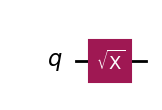

In [41]:
qcoin_sx = QuantumCircuit(1)
qcoin_sx.sx(0)

qcoin_sx.draw("mpl")

In [42]:
obs1 = Pauli("X")
obs2 = Pauli("Y")
obs3 = Pauli("Z")


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_sx)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)


# Step 3: Run the circuit on a real quantum computer

estimator = Estimator(mode=backend)
pubs = [(qc_isa, [[obs1_isa], [obs2_isa], [obs3_isa]])]
job = estimator.run(pubs)
res = job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

[[ 0.03212237]
 [-0.9932441 ]
 [ 0.01172721]]


In [44]:
# Run the job on the Aer simulator with noise model from real backend
sim_pubs = [(qc_isa, [[obs1_isa], [obs2_isa], [obs3_isa]])]
sim_job = estimator_sim.run(sim_pubs)
sim_res=sim_job.result()
print(sim_res[0].data.evs)

[[-0.01025391]
 [-0.96386719]
 [-0.00488281]]


The expectation values are 0, -1, and 0 for X, Y and Z, respectively.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Given the expectation values, what are the probabilities of measuring the quantum coin to be heads up/down (or left/right or forward/back) for each of the 3 measurement axes?
  </summary>

  **Answer:**

  There is a 50/50 probability of measuring either state along X and Z, and the state is always measured in the -y direction along Y.
</details>

This is the same result we got with our thought experiment applying a "$\sqrt{\text{NOT}}$" 90-degree rotation on the classical coin. In fact, there is a precise analogy between the coin and the qubit state now. We can visualize the qubit state as a vector pointing in the direction of heads on a coin, normal to the surface of the coin. So, heads up, or the $|0\rangle$ state on a quantum coin, is equivalent to a vector pointing straight up; heads down, or $|1\rangle$, is pointing straight down. Any equal superposition of $|0\rangle$ and $|1\rangle$ points horizontally. The phase of the state determines the exact horizontal direction - the direction it points along the equator is equal to the direction the coefficient $c_2$ points in the complex plane.

Now, *every* gate that we've seen in this notebook can be visualized as a rotation (or series of rotations) of the coin/vector.

*   NOT: 180 degrees around the x-axis

*   $\sqrt{\text{NOT}}$: 90 degrees around the x-axis

*   PHASE: rotation of $\phi$ around z-axis

*   Hadamard: This one's a bit trickier. We initially likened it to flipping a coin, making the coin spin uncontrollably in the air. But the Hadamard is actually a controlled, deterministic rotation of the coin, like the other gates. The Hadamard is performed by rotating 90 degrees around the y-axis, then 180 degrees around the x-axis.

So, there's nothing random about a quantum superposition state or any of the standard operations we perform on the qubit. Every operation is deterministic and reversible. The only time randomness comes into play is when we decide to *measure* the quantum state.

### The qubit state as a Bloch vector

This vector that points in the direction of the coin's "head" is known as a "Bloch vector." Formally, an arbitrary (isolated) qubit state can be represented by a vector that lies on the surface of a sphere of radius 1 with coordinates $(r, \theta, \phi)$. Written in terms of these coordinates, the qubit state is:

$|\psi\rangle = \cos{\frac{\theta}{2}} |0\rangle + e^{i \phi} \sin{\frac{\theta}{2}} |1\rangle$

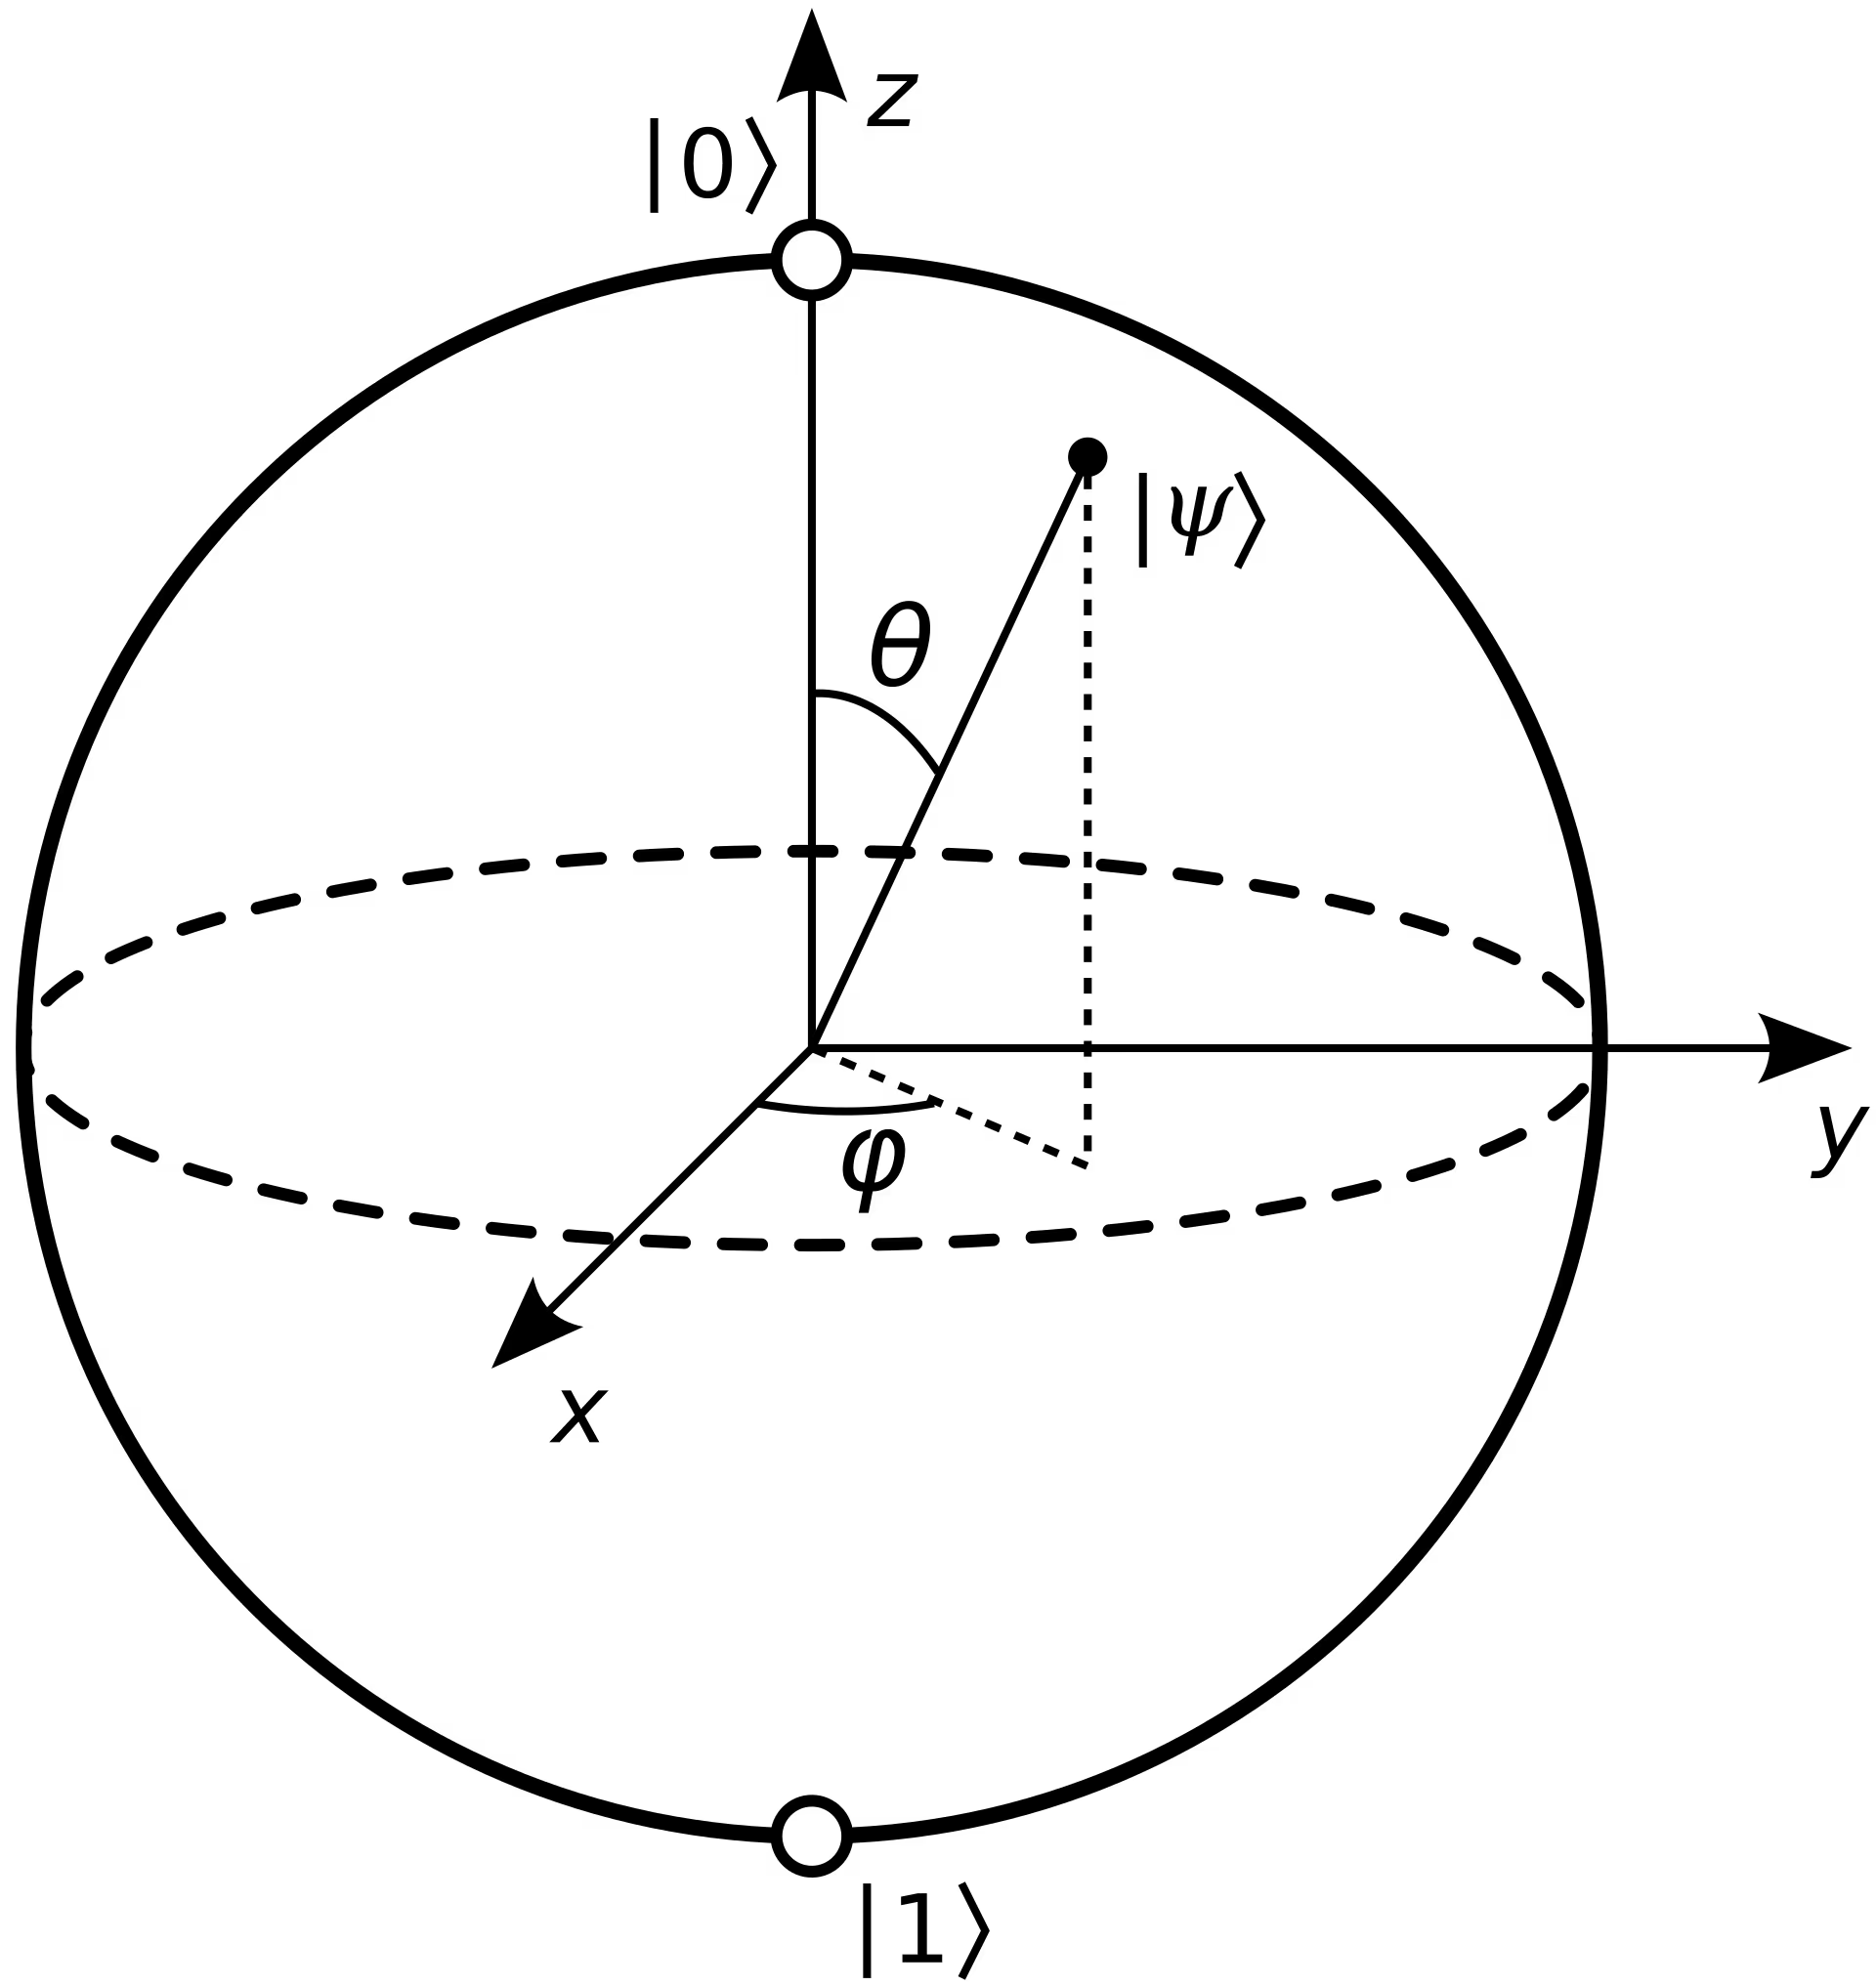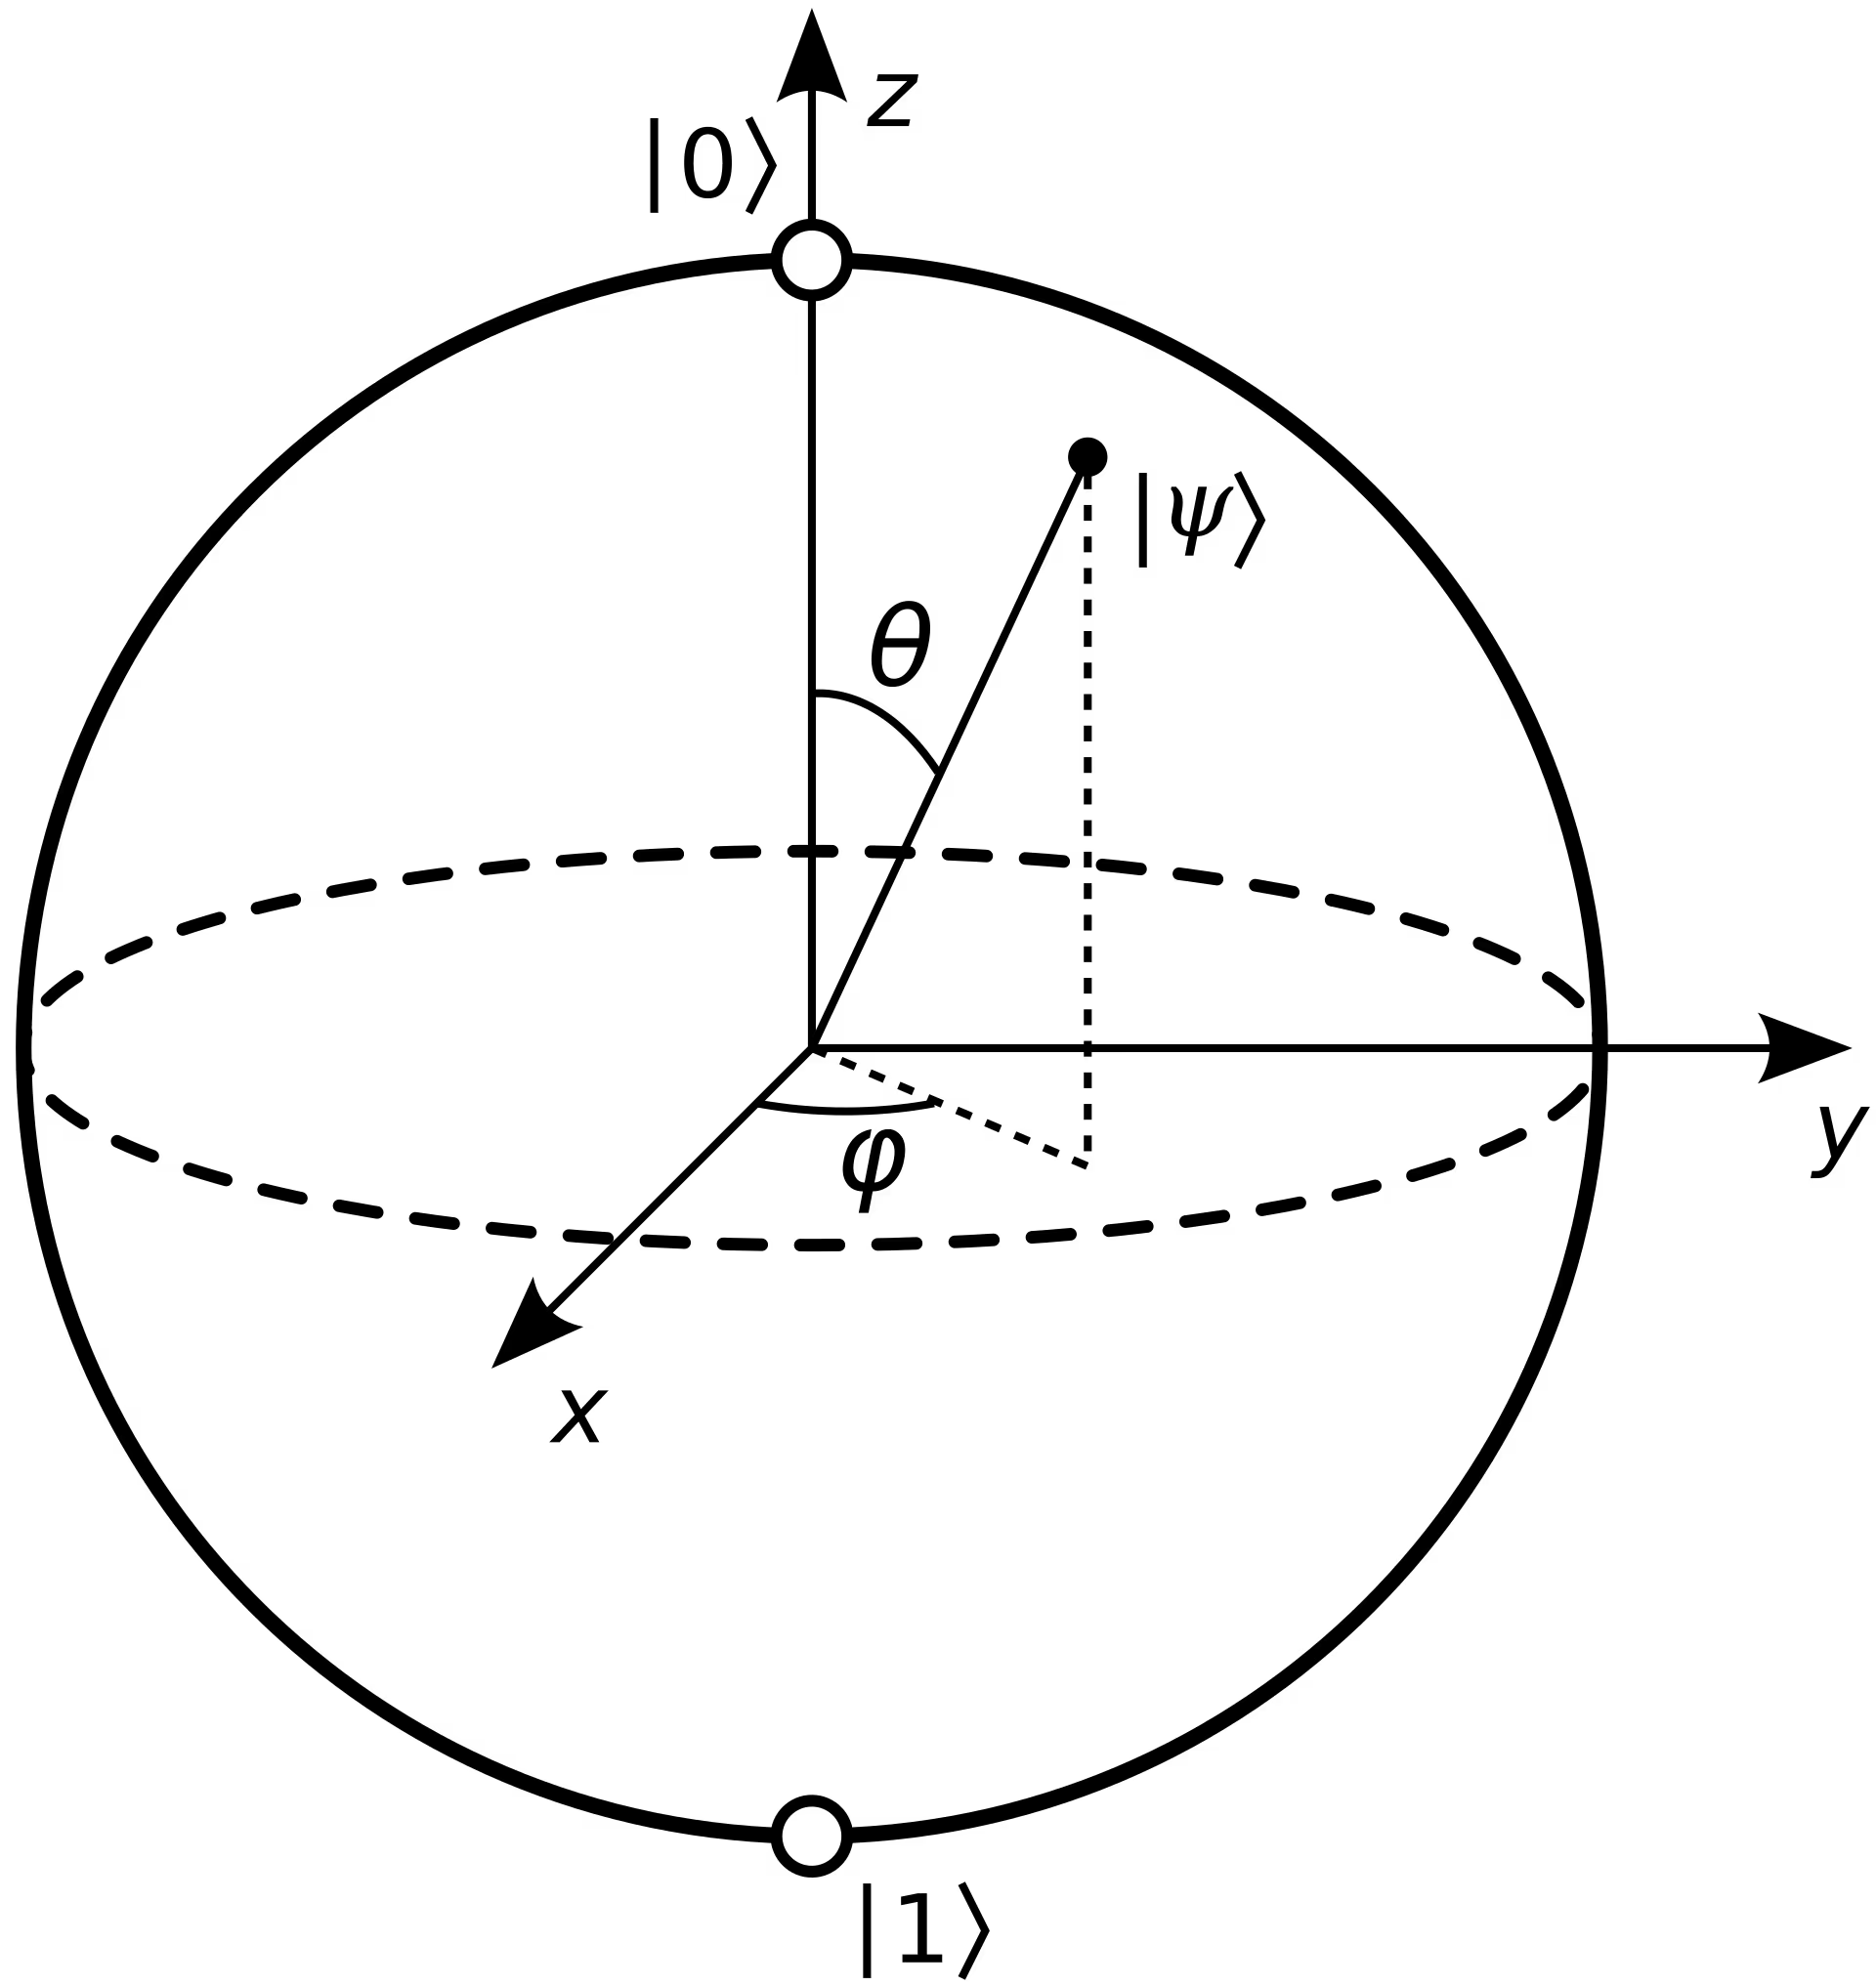

Now let's check with Qiskit about how the Bloch vector changes when we apply various gates to our qubit starting from the $|0\rangle$ state.

#### NOT



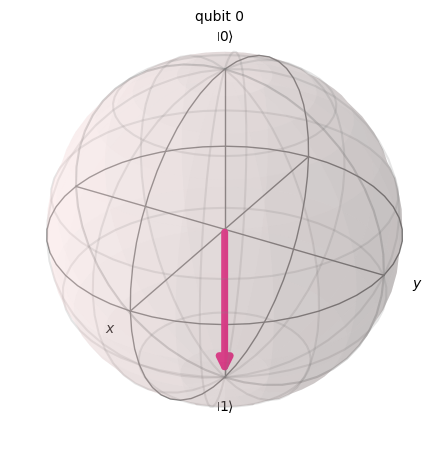

In [45]:
from qiskit.visualization import plot_bloch_multivector

qnot = QuantumCircuit(1)
qnot.x(0)

plot_bloch_multivector(qnot)

#### $\sqrt{\text{NOT}}$



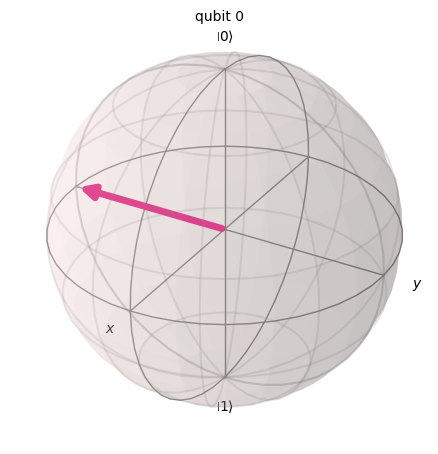

In [46]:
qsqrtnot = QuantumCircuit(1)
qsqrtnot.sx(0)

plot_bloch_multivector(qsqrtnot)

#### PHASE ($\phi = \pi$)



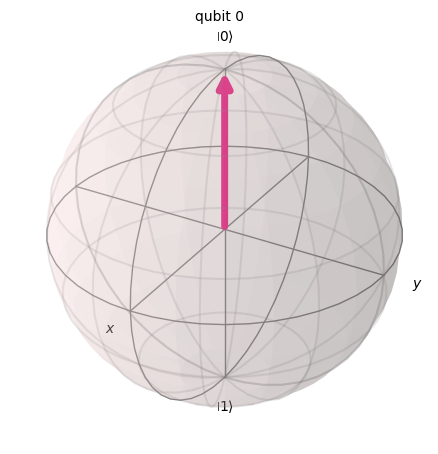

In [47]:
qphase = QuantumCircuit(1)
qphase.p(np.pi, 0)

plot_bloch_multivector(qphase)

#### Hadamard



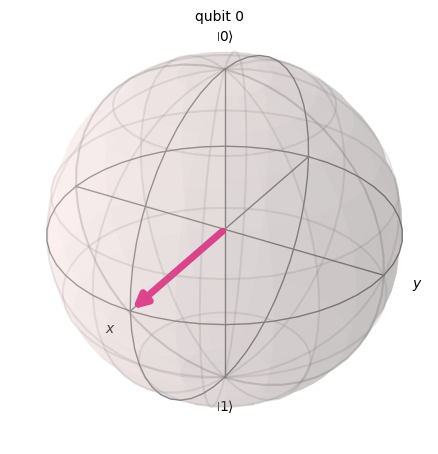

In [48]:
qhadamard = QuantumCircuit(1)
qhadamard.h(0)

plot_bloch_multivector(qhadamard)

## Conclusion - so what *is* a superposition state?

We started this module comparing the randomness of measuring a quantum superposition state to a coin flip. We likened the "Hadamard gate" that produces a quantum superposition to the act of flipping a coin. But, through a series of experiments, we learned that there are fundamental differences between a classical coin flip and a quantum superposition.

We learned that there is actually nothing "random" about a qubit in a superposition state. It is like a coin sitting still in three-dimensional space. In fact, a coin that is free to rotate in 3 dimensions is a very close analogy to a particular way to visualize the quantum state of a qubit, called the Bloch vector. Quantum gates rotate this coin/Bloch vector deterministically and reversibly. It is only when we **measure** the qubit that any randomness is introduced. We compared this measurement process to squashing the coin so that it lies flat in the direction of the measurement axis.

Whether a quantum state is even in a superposition is really just in the eye of the beholder. As you've likely encountered before, we are free to choose our coordinate system - $x$, $y$, and $z$ can point along any three orthogonal directions. So, if we have a superposition of 0 and 1 in one coordinate system, we can define a new coordinate system - or equivalently, a new "measurement basis" - in which the state is pointing purely in the $+z$ direction, and therefore not in a superposition state. So, when we say a qubit is in a superposition, we must also answer the question, "superposition of *what*?"

You may leave this module with the impression that we've just removed all the mystery from quantum mechanics. After all, one of the supposedly "weirdest" aspects, the superposition state of a qubit, is really just as simple as a three-dimensional vector. But keep in mind that the coin is still only an analogy, and even the Bloch vector is only a visualization tool to calculate probabilities of measurement outcomes. We can’t say what a quantum state is *really* doing before it's measured. Because, checking that requires a measurement!

We will discuss this conundrum of what is the “true” nature of a quantum state, how the quantum phenomenon of entanglement can help us elucidate this, in the Bell's Inequality module.



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts:

*   While the measurement of a qubit in a superposition is probabilistic, like flipping a coin, the superposition state itself behaves differently than a flipping coin.
*   A main difference between a classical probability distribution and a superposition is that the superposition has *phase* coherence, which allows it to interfere constructively or destructively.
*   The state of a single, isolated qubit can be visualized as a point on the so-called "Bloch sphere," where the relative amplitudes of the $|0\rangle$ and $|1\rangle$ components determine the polar angle $\theta$ and the relative phases between the two components determine the azimuthal angle $\phi$.
*   All single-qubit quantum gates can be viewed as rotations of the vector on this sphere.

### T/F questions:

1.  T/F A quantum superposition is basically the same as a probabilistic event in classical physics, like flipping a coin.

F


2.  T/F The length of the Bloch vector describing the state of a single isolated qubit is always 1.

T


3.  T/F Single-qubit quantum gates do not change the length of the Bloch vector.

T


### MC questions:

1.  Select the correct Bloch vector that represents the state $|\Psi\rangle = \sqrt{\frac{1}{3}}|0\rangle + e^{i \pi / 4} \sqrt{\frac{2}{3}}|1\rangle$ :

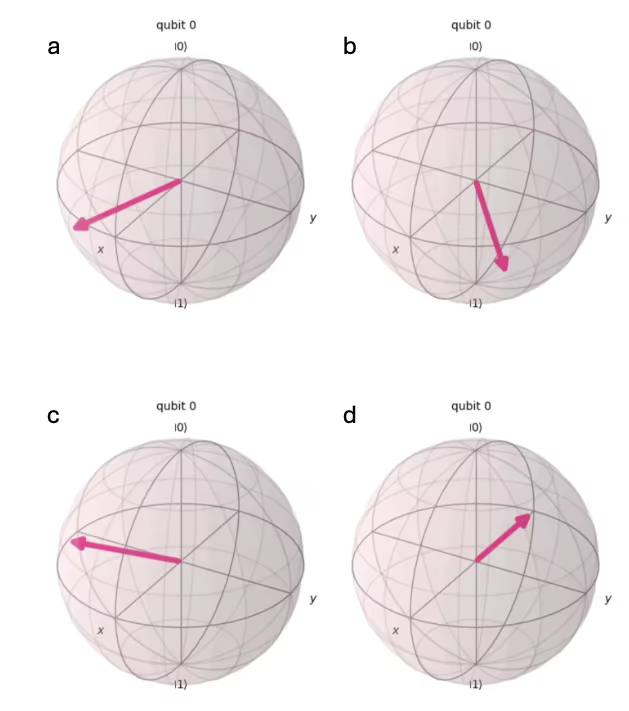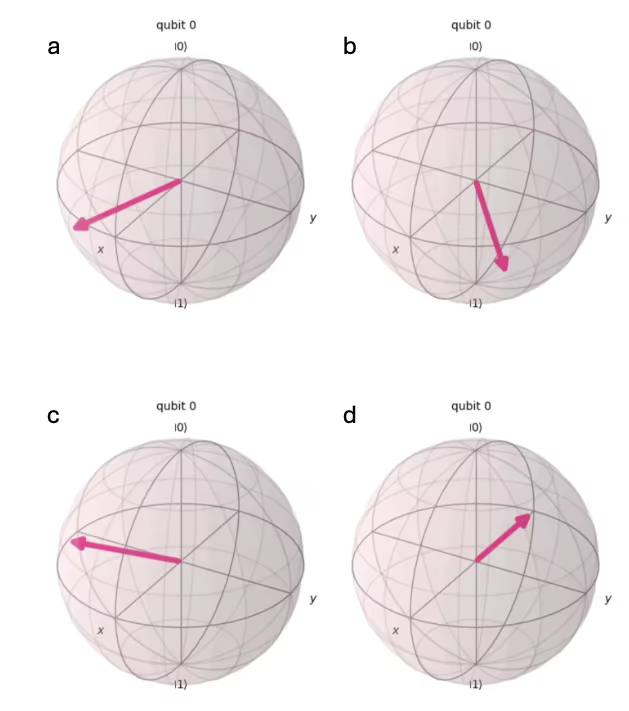

b seems to be the correct one.

2.  The Bloch sphere describes a qubit's:
    (select all that apply)

    a. amplitude

    b. entanglement with other qubits

    c. phase

    d. color

    e. probability of measurement outcomes

### a. Amplitude - YES

The Bloch sphere encodes the amplitudes of |0⟩ and |1⟩ through the polar angle θ.

A general qubit state:
$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$

The θ angle determines how the amplitude is split between the two basis states.

---

### b. Entanglement with other qubits - NO

The Bloch sphere **only represents single qubit states**. 

Entanglement is a multi-qubit property that cannot be captured by a single Bloch sphere. Entangled states cannot be factorized into individual qubit representations.

Example: The Bell state $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ cannot be represented on individual Bloch spheres.

---

### c. Phase - YES

The azimuthal angle φ around the z-axis represents the **relative phase** between |0⟩ and |1⟩.

This is the phase we manipulated with Rz(θ) in the previous problem to change measurement probabilities.

---

### d. Color - NO

Color is not a physical property of qubits. (Though we may use colors in visualizations!)

---

### e. Probability of measurement outcomes - YES

The position on the Bloch sphere directly determines measurement probabilities:

**From the polar angle θ:**
- $P(|0\rangle) = \cos^2(\theta/2)$
- $P(|1\rangle) = \sin^2(\theta/2)$

**From the z-coordinate:**
- $z = \cos\theta = \langle Z \rangle = P(|0\rangle) - P(|1\rangle)$

**Examples:**
- North pole (θ=0): P(|0⟩)=1, P(|1⟩)=0
- South pole (θ=π): P(|0⟩)=0, P(|1⟩)=1  
- Equator (θ=π/2): P(|0⟩)=0.5, P(|1⟩)=0.5

---

so, a, c, e 



### Discussion questions:

1.  Why can the state of a qubit be visualized on the Bloch sphere, but the probability distribution of a coin flip cannot?

Bloch sphere is a illustration of the quantum coin, waiting to be fliped. The probability distribution will be the result of mulipule trails of measurements, which will be the collection of collapsed states. Bloch sphere does not fit into this situation.

3.  Why is a coin flipping in the air not the best analogy to a quantum superposition state? What aspect of superpositions are not captured in this analogy?

## Why a Flipping Coin is NOT a Good Analogy for Quantum Superposition

### The Key Difference

**Classical coin in the air:**
- The coin IS either heads or tails at every moment - we just don't know which

**Quantum superposition:**
- The qubit genuinely exists in BOTH states simultaneously until measured
- This is **ontological** - a fundamental feature of reality
- The state is |ψ⟩ = α|0⟩ + β|1⟩, not "either |0⟩ or |1⟩"

---

### What the Coin Analogy Misses

#### 1. **Quantum Interference**

The most important missing aspect is **interference**.

**With quantum superposition:**
- States can interfere constructively or destructively
- Example from our H-Rz(θ)-H circuit:
  - The phase rotation changed measurement probabilities from 50/50 to 25/75
  - This happened because the amplitudes interfered differently based on phase

$$|\psi\rangle = \frac{1}{2}[(1 + e^{i\theta})|0\rangle + (1 - e^{i\theta})|1\rangle]$$

- The terms $(1 + e^{i\theta})$ and $(1 - e^{i\theta})$ show interference
- When θ = 2π/3, the |0⟩ amplitude interferes destructively, reducing P(|0⟩) to 0.25

**With classical probability:**
- Probabilities just add - no interference
- A coin can't "interfere with itself"
- You can't manipulate a coin's "phase" to change the 50/50 odds

---

#### 2. **Phase Relationships Matter**

**Quantum:**
- The relative phase between amplitudes is physical and measurable
- States |+⟩ = (|0⟩ + |1⟩)/√2 and |-⟩ = (|0⟩ - |1⟩)/√2 have same probabilities but are different states
- Phase affects interference patterns

**Classical:**
- No concept of "phase" for probabilities
- Heads with 50% probability is just heads with 50% probability

---

#### 3. **Measurement Creates Reality**

**Quantum:**
- Before measurement: truly in superposition (both states)
- Measurement forces the system to "choose" a definite state
- The act of measurement fundamentally changes the state

**Classical:**
- Before observation: already in a definite state
- Observation just reveals the pre-existing state
- Looking at the coin doesn't change what it is

---

### A Better Analogy

**Wave interference** is a better classical analogy:
- Two water waves can constructively or destructively interfere
- The interference pattern depends on their relative phase
- But even this is imperfect because waves are still classical

---

## Summary

The coin analogy fails because it treats quantum superposition as **"we don't know which"** when it's actually **"genuinely both simultaneously."**

The critical missing aspect is **quantum interference** - the ability of superposition amplitudes to interfere based on their phase relationships, creating probabilities that have no classical explanation.

This is what makes quantum computing powerful: we can manipulate these interference patterns through gates to solve problems in ways impossible for classical systems.


### Challenge problems:

1.  Use Qiskit to create a circuit that transforms the state $|0\rangle$ to the state $\frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}e^{i \frac{5\pi}{6}}|1\rangle$



### Reflection: Key Takeaway

The critical difference revealed by measuring in the X-basis: a classical coin in a 50-50 mixture would give $\langle X \rangle = 0$, but the quantum coin in $|+\rangle$ gives $\langle X \rangle = 1$. This confirms the state has **phase coherence**, not just probabilistic uncertainty. This coherence is what enables interference in quantum algorithms.

## Creating a Specific Quantum State

**Goal:** Transform $|0\rangle$ to $|\psi\rangle = \frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}e^{i\frac{5\pi}{6}}|1\rangle$

---

### Step 1: Identify the Parameters

General single-qubit state form:
$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$$

Compare with target state:
- $\cos(\theta/2) = \frac{\sqrt{3}}{2}$
- $e^{i\phi}\sin(\theta/2) = \frac{1}{2}e^{i\frac{5\pi}{6}}$

**Solve for θ:**
$$\cos(\theta/2) = \frac{\sqrt{3}}{2}$$
$$\theta/2 = \arccos\left(\frac{\sqrt{3}}{2}\right) = \frac{\pi}{6}$$
$$\theta = \frac{\pi}{3}$$

**Verify with sin:**
$$\sin(\theta/2) = \sin(\pi/6) = \frac{1}{2}$$

**Phase:**
$$\phi = \frac{5\pi}{6}$$

---

### Step 2: Circuit Implementation

**Method 1: Using Ry and Rz gates**

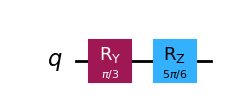

In [49]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create circuit
qc = QuantumCircuit(1)

# Apply Ry rotation for amplitude
qc.ry(np.pi/3, 0)

# Apply Rz rotation for phase
qc.rz(5*np.pi/6, 0)

# Display circuit
qc.draw('mpl')

In [54]:
# Varify the results
# Get the statevector
state = Statevector(qc)

# Display the state
print("Statevector:")
print(state)

# Verify the coefficients
print("\nCoefficients:")
print(f"|0⟩ coefficient: {state[0]}")
print(f"|1⟩ coefficient: {state[1]}")

# Check amplitudes
print(f"\n|0⟩ amplitude: {np.abs(state[0]):.4f} (expected: {np.sqrt(3)/2:.4f})")
print(f"|1⟩ amplitude: {np.abs(state[1]):.4f} (expected: 0.5000)")

# Check phase of |1⟩
phase = np.angle(state[1])
print(f"|1⟩ phase: {phase:.4f} radians (expected: {5*np.pi/6:.4f})")

Statevector:
Statevector([0.22414387-0.8365163j , 0.12940952+0.48296291j],
            dims=(2,))

Coefficients:
|0⟩ coefficient: (0.2241438680420134-0.8365163037378079j)
|1⟩ coefficient: (0.12940952255126034+0.4829629131445341j)

|0⟩ amplitude: 0.8660 (expected: 0.8660)
|1⟩ amplitude: 0.5000 (expected: 0.5000)
|1⟩ phase: 1.3090 radians (expected: 2.6180)


### The Key Insight: Relative Phase vs Absolute Phase

**What matters in quantum mechanics:** The **relative phase** between states, not absolute phases.

Calculate the phases:
- Phase of |0⟩: $\arg(0.224-0.836j) = \arctan(-0.836/0.224) \approx -1.309$ rad $\approx -\frac{5\pi}{12}$
- Phase of |1⟩: $\arg(0.129+0.483j) = \arctan(0.483/0.129) \approx 1.309$ rad $\approx \frac{5\pi}{12}$

**Relative phase:**
$$\phi_{relative} = 1.309 - (-1.309) = 2.618 \text{ rad} \approx \frac{5\pi}{6}$$ 

It's just multiplied by a global phase $e^{-i5\pi/12}$

### Why This Happens

The Rz gate is defined as:
$$R_z(\phi) = \begin{pmatrix} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2} \end{pmatrix}$$

After Ry(π/3) + Rz(5π/6):
$$e^{-i5\pi/12}\left[\frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}e^{i5\pi/6}|1\rangle\right]$$

This has the correct relative phase, just with a global phase factor $e^{-i5\pi/12}$ that shifts everything.

so, what we could do is to add a gloable phase adjustment:

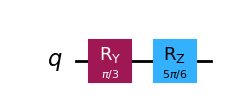

In [55]:
# Create circuit
qc2 = QuantumCircuit(1)

# Apply Ry rotation for amplitude
qc2.ry(np.pi/3, 0)

# Apply Rz rotation for phase
qc2.rz(5*np.pi/6, 0)

# Compensate for the global phase
qc2.global_phase = 5*np.pi/12  

# Display circuit
qc.draw('mpl')

In [56]:
# Varify the results
# Get the statevector
state = Statevector(qc2)

# Display the state
print("Statevector:")
print(state)

# Verify the coefficients
print("\nCoefficients:")
print(f"|0⟩ coefficient: {state[0]}")
print(f"|1⟩ coefficient: {state[1]}")

# Check amplitudes
print(f"\n|0⟩ amplitude: {np.abs(state[0]):.4f} (expected: {np.sqrt(3)/2:.4f})")
print(f"|1⟩ amplitude: {np.abs(state[1]):.4f} (expected: 0.5000)")

# Check phase of |1⟩
phase = np.angle(state[1])
print(f"|1⟩ phase: {phase:.4f} radians (expected: {5*np.pi/6:.4f})")

Statevector:
Statevector([ 0.8660254-2.47944559e-17j, -0.4330127+2.50000000e-01j],
            dims=(2,))

Coefficients:
|0⟩ coefficient: (0.8660254037844387-2.4794455854755286e-17j)
|1⟩ coefficient: (-0.4330127018922193+0.24999999999999994j)

|0⟩ amplitude: 0.8660 (expected: 0.8660)
|1⟩ amplitude: 0.5000 (expected: 0.5000)
|1⟩ phase: 2.6180 radians (expected: 2.6180)


Now the phase is correct.

# Tutorial 2: The Stern-Gerlach experiment using quantum computers


## Background

Regardless of the type of angular momentum, a charge with angular momentum has a magnetic moment. In the classical treatment of orbital motion, one would expect a particle of charge $q$, mass $m$ and angular momentum $\vec{L}$ to have a magnetic moment $\mu$ given by

$$
\vec{\mu} = \frac{q}{2m}\vec{L}
$$

It turns out that almost the same formula holds for quantum mechanical angular momentum, with the caveat of adding a numerical ratio related to the type of angular momentum, called the g-factor $g$. When combining different types of angular momentum, or generalizing to an arbitrary type, one often sees $\vec{J}$ used instead of $\vec{L}$, so we write:

$$
\vec{\mu} = \frac{gq}{2m}\vec{J}
$$

For classical objects $g=1$. For electrons, $g\approx 2$, and there are many values for various nuclei and subatomic particles. The main point here is that quantized angular momentum means a quantized magnetic moment!

This magnetic moment will experience a torque in a magnetic field:

$$
\vec{\tau}=\vec{\mu}\times \vec{B}
$$

And it will experience a force in a magnetic field with a non-zero gradient:

$$
\vec{F} = \nabla(\vec{\mu}\cdot\vec{B})
$$

We will often consider the above expression one component at a time, so it may be convenient to think of its $z$-component:

$$
F_z = \mu_z \frac{dB_z}{dz}
$$

Combining expressions, we can obtain

$$
F_z = \frac{gq}{2m} \frac{dB_z}{dz} J_z
$$

### What should we expect, classically?

How would these atoms behave if they were exactly like bulky, classical magnets? You can do the experiment. Imagine firing tiny neodymium magnets past a large, powerful magnet. The orientation of the tiny magnets is random. But as they pass the large magnet, they quickly re-orient themselves to align with the field, and become attracted to the large magnet. The vast majority of tiny magnets are deflected toward the large magnet. The very astute observer might question, "What about energy conservation?"

Indeed, a magnetic moment in an external magnetic field has a potential energy associated with it:

$$
U = -\vec{\mu}\cdot \vec{B} = -\mu B \cos(\theta)
$$

So, if a magnetic moment were to rotate in the external magnetic field, there would be a change in energy given by:

$$
\Delta U = U_f - U_i = -\mu B (\cos(\theta_f) - \cos(\theta_i)).
$$

In the special case of a small magnet perfectly anti-aligned with the external field flipping over and aligning with it, this would correspond to a decrease in potential energy:

$$
\Delta U = U_f - U_i = -\mu B (\cos(0) - \cos(\pi)) = -2\mu B.
$$

So where does that energy go? A classical magnet like a small neodymium refrigerator magnet has many particles and can dissipate almost any quantity of energy as heat. The initial and final angles between the magnetic moment and the external magnetic field could be anything, and at least the initial orientation would be random. So a different amount of energy would be dissipated as heat for each tiny magnet. But classically this is no problem, since an ensemble of classical particles can dissipate any amount of energy as heat.

### What should we expect applying classical thinking to atomic scales?

At the very least this is not the same for atomic-scale magnets, because there are fewer particles in play, fewer degrees of freedom through which energy may be dissipated. The proposals of early quantum mechanics suggested further that the energy that can be absorbed by an individual particle, such as the electron, would be quantized, meaning an electron could only absorb a few specific amounts of energy. Since the random initial orientations would require the dissipation of random amounts of energy, this should not be possible for a system with quantized energy levels. The excess energy could not be dissipated as heat. So what would happen instead?

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Explain what you think would happen in a situation like that described above. That is, you have an atomically small magnet that cannot dissipate any energy as heat. So, any initial magnetic potential energy must remain in the system. Yet, a torque is applied by an external magnetic field, which attempts to rotate the small magnet to align with the external field. What happens?
  </summary>

  **Answer:**

  The tiny magnetic moment would rotate toward alignment with the external field. But when it momentarily aligns, it would have rotational kinetic energy that would keep it rotating past the field and back out of alignment. This behavior can even be seen in large classical magnets. But in those classical systems, the oscillation of the small magnetic moment eventually stops as energy is dissipated into heat. But in a system with no such dissipative mechanism, the oscillation should continue indefinitely.
</details>

<details>
  <summary>
    Given the behavior expected in the answer above, what distribution of magnetic particles would you expect to see on the screen?
  </summary>

  **Answer:**

  A smooth distribution from some maximum deflection toward the stronger side of the magnetic field (those particles that happened to start out aligned with the external field) to some maximum deflection toward the weaker side of the field (those particles that started out anti-aligned with the external field), and every deflection in between, corresponding to every initial orientation between those extrema.

  ![Diagram of a beam of particles passing through a magnet. They are deflected to varying degrees along the direction of the magnetic field. So when they strike a distant screen they form a line.](/learning/images/modules/quantum-mechanics/stern-gerlach-measurements-with-qiskit/sg-classical.avif)
</details>

### What would quantum mechanics predict?

Perhaps the strangest of all possibilities would be the following: What if the angular momentum of the electron were quantized, but also its projection on some axis were also quantized? The quantization of angular momentum as a magnitude is interesting, but one might try to argue through it using classical intuition, the way planetary orbits settled into fixed paths that don't cross each other, having only certain allowed angular momenta. But what if that angular momentum vector could only point exactly along $z$ or exactly opposite $z$, but not have any other component along $z$? What if then when measured along a different direction, the vector could only point entirely along $x$ or entirely opposite $x$, and nothing in between? That would be strange in a way that confounds all classical intuition.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

    What sort of distribution of particles on a screen would you expect to find in this last case, where the projection of angular momentum along the direction of the field is quantized? Feel free to consider only particles that pass perfectly through the center of the device, or include those that veer slightly off center to where the gradient is weaker. Just be explicit.

If as mentioned, the quantized magnetic moment will lead to a quantized change in energy, the particles will distributed not as a continues trace, but as a quantized position (dots).

## First experiment: A single measurement

In this first experiment and throughout the module, we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

*   Step 1: Map classical inputs to a quantum problem
*   Step 2: Optimize problem for quantum execution
*   Step 3: Execute using Qiskit Runtime Primitives
*   Step 4: Post-processing and classical analysis

We will generally follow these steps, though we may not always explicitly label them.

### Step 1: Map classical inputs to a quantum problem

Here, the classical inputs are orientations of a spin prior to measurement in a Stern-Gerlach device. Don't worry too much about the exact nature of the quantum state prior to measurement. That is the subject of a different Qiskit Classrooms module, on Bell's theorem.

Note that IBM quantum computers measure states along the $z$ axis. So this first experiment will be very much like the Stern-Gerlach experiment with the magnetic field gradient along $z$. We will see how to change the system to measure along different directions, later.

Let's begin by making the analog of a spin state, that is, some mixture of $|\uparrow\rangle$ and $|\downarrow\rangle$ or equivalently of $|0\rangle$ and $|1\rangle$. We have proposed some initial values. But feel free to play with other values or even random values.



In [68]:
import random
from numpy import pi
import numpy as np

# Use these lines to choose your own arbitrary state vector and normalize it.
# a = 2
# b = (1+1j)
# norm = np.sqrt(a*np.conjugate(a)+b*np.conjugate(b))
# a = a/norm
# b = b/norm
# print(a,b)

# Use these lines if you would rather look at at random spin orientations.
a = random.random()
b = random.random()
norm = np.sqrt(a * np.conjugate(a) + b * np.conjugate(b))
a = a / norm
b = b / norm
print(a, b)

0.6521585467014857 0.7580826010166744


Now we will use the angles above as parameters in a quantum circuit. We are considering only one particle at a time, so we will use only one qubit in our circuit, and we will require only one classical register.

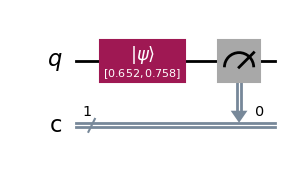

In [69]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the quantum state
qc.initialize([a, b])
qc.measure(0, 0)
qc.draw("mpl")

### Step 2: Optimize problem for quantum execution

To run our experiment on a real quantum computer, we need to load Qiskit Runtime Service, and select a quantum computer (or a "backend"). Below, we simply select the least busy quantum computer available to us.


In [60]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Syntax for specifying a channel and instance (if you need to change from the default set above)
# service = QiskitRuntimeService(channel='<channel name here>', instance="<your instance name here>")

# Load saved credentials
service = QiskitRuntimeService()

management.get:WARNING:2025-10-22 20:22:11,738: Loading default saved account


In [61]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

# Use the least busy backend, specify options as needed
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.least_busy()
print(backend.name)

ibm_torino


We now must transpiled the circuit, meaning we must map our circuit onto the base gates available to our chosen quantum computer, and we want to optimize our circuit for running on that quantum computer.



In [62]:
# Transpile the circuit and optimize for running on the quantum computer selected
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
qc_ibm = pm.run(qc)

### Step 3: Execute using Qiskit Runtime Primitives

Now we want to run this on a real quantum computer. All the necessary syntax for that is in the code block below. If you have exhausted your allotted time on real quantum computers, or if you are without an internet connection, you can uncomment the next code block, which will run the code on a local simulator.



In [ ]:
# Specify that we want to use only a single shot, to represent a single measurement of a spin in a SG device.
# num_shots = 1

# Evaluate the problem using a QPU via Qiskit IBM Runtime
# The best practice is to use a session as shown below. This is available to Premium Plan, Flex Plan, and On-Prem (IBM Quantum Platform API) Plan users.
# with Session(backend=backend) as session:
#     sampler = Sampler(mode=session)
#     dist = sampler.run([qc_ibm], shots=num_shots).result()
# session.close()
# counts = dist[0].data.c.get_counts()

# Open users can still carry out this experiment, but without making use of a session, meaning repeated queuing is possible.
# from qiskit_ibm_runtime import Batch,
# batch = Batch(backend=backend)
# sampler = Sampler(mode=batch)
# dist = sampler.run([qc_ibm], shots=num_shots).result()
# Close the batch because no context manager was used.
# batch.close()
# counts = dist[0].data.c.get_counts()

Use the code below if you are unable to run the experiment on a real quantum computer.



In [70]:
# This uses a local simulator
from qiskit_aer import AerSimulator

# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)

# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2
sampler = BackendSamplerV2(backend = backend_sim)

num_shots = 1

# This runs the job
dist = sampler.run([qc_ibm], shots = num_shots).result()

# This selects measurement counts for the 0th circuit, which in this case is the only circuit
counts=dist[0].data.c.get_counts()

counts =  {'1': 1}


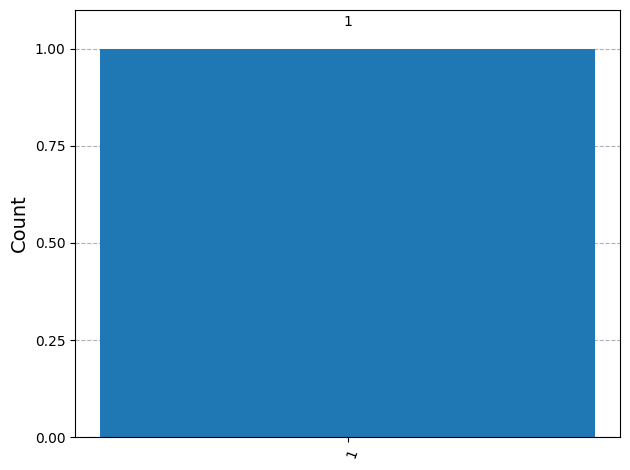

In [71]:
from qiskit.visualization import plot_histogram

print("counts = ", counts)
plot_histogram(counts)

We made one measurement and obtained "1". This is no surprise for us. We know we are using a quantum computer composed of qubits and we're very accustomed to classical bits returning a 0 or a 1. But keep in mind: this is the quantum computing analog of the experiments done with particles with magnetic moments. If we had expected an even spread between 0 and +1, it might indeed have surprised us that we obtained one extremum on our first measurement. It is this surprising quantization of results in the Stern-Gerlach experiment that led us to a better understanding of nature, and that in turn helped us eventually build quantum computers.

Let's see what happens when we make an ensemble of measurements.


## Second experiment: Measuring many particles

To gather statistics on many such measurements, we don't need to repeat steps 1 & 2. We can simply increase the number of shots in our experiment. Feel free to play with the number of shots in the instance of step 3 below.



In [79]:
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

num_shots = 100

# Evaluate the problem using a QPU via Qiskit IBM Runtime
# Open users can still carry out this experiment, but without making use of a session, meaning repeated queuing is possible.
from qiskit_ibm_runtime import Batch
batch = Batch(backend=backend)
sampler = Sampler(mode=batch)
dist = sampler.run([qc_ibm], shots=num_shots).result()
# Close the batch because no context manager was used.
batch.close()
counts = dist[0].data.c.get_counts()

As before, if you are unable to run on a real quantum computer, uncomment the block above from the first experiment, and simply change `num_shots = 1` to `num_shots = 100` or more.



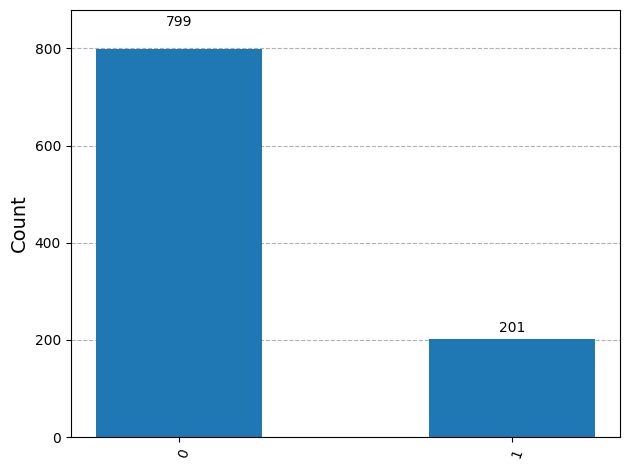

In [75]:
plot_histogram(counts)


## Third experiment: Random spins in an oven

In the Stern-Gerlach experiment, the researchers didn't get to specify an angle at which an angular momentum vector would emerge from the oven. The orientations were random (or something even more mysterious! See the Qiskit Classroom module on Bell's theorem). A reasonable analog of that experiment would be for us to randomly initialize the states of our qubit and make measurements many times.

### Step 1: Map classical inputs to a quantum problem

The circuit we want to construct is the same as before. The only difference is that this time, we will construct the circuit using gates with free parameters $\theta$ and $\phi$. Numerical values for those parameters will then be assigned for each new run.



<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\jackz\AppData\Local\Temp\ipykernel_122832\397465154.py:4: SyntaxWarning: invalid escape sequence '\p'
  phi = Parameter("$\phi$")


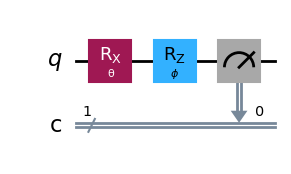

In [80]:
# from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter("θ")
phi = Parameter("$\phi$")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add rotation gates for rotating the state of qubit 0 to random orientations
qc.rx(theta, 0)
qc.rz(phi, 0)
qc.measure(0, 0)

qc.draw("mpl")

In [81]:
# This uses a local simulator
from qiskit_aer import AerSimulator

# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSamplerV2

# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# from qiskit.primitives import BackendSamplerV2
# sampler = BackendSamplerV2(backend=backend)

In [82]:
# A list to store the accumulated probabilities of the two possible measurement outcomes.
probslist = {"0": 0.0, "1": 0.0}

# Choose how many "particles"/measurements
measurements = 100
num_shots = 1

for i in range(measurements):
    # Assign a random orientation for each measurement
    phi = random.random() * 2 * pi
    theta = random.random() * 2 * pi

    angles = [phi, theta]
    circuit = qc.assign_parameters(angles)
    qc_ibm = pm.run(circuit)

    # Run the circuit
    # job = sampler.run([circuit],num_shots = 1)
    dist = sampler_sim.run([qc_ibm], shots=num_shots).result()

    # Update the list of probabilities
    zeroterm = dist[0].data.c.get_counts().get("0") or 0
    oneterm = dist[0].data.c.get_counts().get("1") or 0
    probslist.update({"0": probslist.get("0") + zeroterm})
    probslist.update({"1": probslist.get("1") + oneterm})

probslist.update({"0": probslist.get("0") / measurements})
probslist.update({"1": probslist.get("1") / measurements})
# print(probslist)

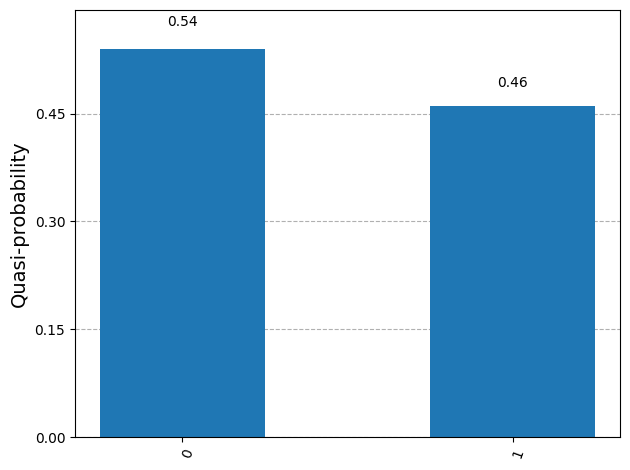

In [83]:
plot_histogram(probslist)

So we see that the random initial state of the qubits (corresponding to random orientations of the angular momentum in a Stern-Gerlach experiment) yield similar numbers of 0 and 1 states (like similar numbers of spin up and spin down states). This is exactly what the original Stern-Gerlach experiment showed.



## Fourth experiment: Repeated measurements

When a qubit starts in a random state, we see there is a roughly 50-50 chance of measuring one extremum over the other. But what happens to the qubit's state (or the particle's angular momentum) after the measurement? To answer that, we'll need to define a circuit that allows us to make multiple measurements of the same qubits. Let us define a circuit that we can use to investigate this. We will want to allow for the possibility of measuring both states $|0\rangle$ and $|1\rangle$, so we need something to rotate the qubit's initial state away from the default $|0\rangle$ state. In this case, we will use a hadamard gate $H$, since $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. Note that, by default, both of these measurements will be along $z$.



In [87]:
from qiskit import QuantumCircuit

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the qubit to be a mixture of 0 and 1 states.
qc.h(0)

# Add a first measurement
qc.measure(0, 0)
qc.barrier()

# Add a second measurement
qc.measure(0, 1)

qc.draw("mpl")

qc_ibm = pm.run(qc)

In [ ]:
# Step 3: Run the job
num_shots = 100
dist = sampler.run([qc_ibm], shots=num_shots).result()
# To run on a simulator, uncomment the line below and comment out the line above.
# dist = sampler_sim.run([qc_ibm], shots=num_shots).result()
counts = dist[0].data.c.get_counts()
print(counts)

In [ ]:
# Step 4: Post-process
plot_histogram(counts)

In the figure above, the bins are labelled "00", "01" and so on. Here, these numbers refer to "2nd outcome, 1st outcome". So "00" means both measurements yielded the $|0\rangle$ state, and "01" means the first measurement yielded $|1\rangle$, and the second yielded $|0\rangle$. The vast majority of qubits were either measured to be in $|0\rangle$ twice, or measured to be $|1\rangle$ twice. It was very rare for qubits to be measured in one state and then measured to be in another state, and the few cases in which that happened (\~1%) are due to noise. In this case that noise has been simulated in keeping with the behavior of the real quantum system. This observed correlation between successive measurements is also observed in Stern-Gerlach-type measurements of particles with spin angular momentum. If a particle is measured to be "spin-up", a subsequent measurement shortly after that will once again yield "spin-up" (up to some small variation due to noise).

This may seem trivial. After all, if a qubit is measured to be in one state, and then I measure it again, quickly, why wouldn't it still be in that state? But if we really latch on to this subtlety, it may help us select some mathematical tools to describe this phenomenon.



## Analysis of experiments thus far

Let's collect a few observations from our experiments so far:

*   The measurement of a quantum mechanical system will only yield one of a set of "allowed values". For two-level systems like qubits or spin-1/2 particles, a measurement will only yield one of the binary outcomes.
*   When we randomly initialize the state of our binary system (like spin-1/2 particles emerging from an oven), either of the binary measurement outcomes is possible.
*   Once a measurement is made and the state of the system is known, repeating the measurement of the same physical observable does not change the state! That is, if we obtain the 0 state once, when we measure again it is still in the 0 state (up to some minor noise in the system \~0.1% to 1%).

Take explicit notice that we have not yet addressed the probabilistic nature of quantum mechanics, nor said anything about "collapsing" the state to an eigenstate. Using only the observations above, it might be tempting to look for a mathematical operation $O$ that leaves some special set of quantum mechanical states $|\psi\rangle$ unchanged up to perhaps a constant: $O|\psi\rangle = c|\psi \rangle$, since measuring along $z$ twice yields the same result. Ultimately, that search will fail to describe all the behaviors we will see. But it can describe some things, so we will pursue it a bit longer.

There does exist such an operation. Matrix operation on some vectors changes the vectors, and matrix operation on other vectors (eigenvectors) leaves the vector unchanged up to a constant. Take for example the matrix $M$ and the vector $|v\rangle$ where

$$
M= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}
$$

and

$$
|v\rangle = \begin{pmatrix} 1\\1 \end{pmatrix}
$$

Note that

$$
M|v\rangle= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}\begin{pmatrix} 1\\1 \end{pmatrix} = \begin{pmatrix} 1*1+2*1\\2*1+1*1 \end{pmatrix} = \begin{pmatrix} 3\\3 \end{pmatrix} = 3|v\rangle.
$$

But for other vectors, say $|v'\rangle = \begin{pmatrix} 1\\2\end{pmatrix}$, we have

$$
M|v'\rangle= \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}\begin{pmatrix} 1\\2 \end{pmatrix} = \begin{pmatrix} 1*1+2*2\\2*1+1*2 \end{pmatrix} = \begin{pmatrix} 5\\4 \end{pmatrix} \neq c|v'\rangle.
$$

We might try to describe the spin of a particle using a matrix, and we might try to describe the states of the particles after measurement using a vector, called a "state vector". It is not at all obvious what values should go into such a matrix or state vector, but the only property we have from the measurements so far that we could use to label states would be the probability of measuring 0 or 1 ("spin-up" or "spin-down" in the context of spin-1/2 particles). We should consider that the entries in the state vectors should be related to this probability (exactly the probability, "probability amplitude" - meaning we square the entry to obtain the probability, and so on). But at this point, we're not sure if the entries in these matrices should be strictly real, complex, or what. To be safe, let's attempt to develop a framework in which the vectors and matrices satisfy the following:

*   The matrix operators are connected to experiment as much as possible. For example, we could associate the eigenvalues of a spin matrix with the experimentally observed spin projections.
*   The state vectors should be connected to probability in the following way: If a particle is in the state vector $|A\rangle$, the probability that a subsequent measurement will find the particle in the state $|B\rangle$ is $P_{AB}\equiv |\langle A| B \rangle|^2$.

This gives us a ton of freedom in developing our first matrices. For example, we could naively try

$$
|0\rangle \sim |\uparrow\rangle \sim \begin{pmatrix} 1 \\0 \end{pmatrix}.
$$

Here the $|0\rangle \sim |\uparrow\rangle$ means that there are states in quantum computers and in spin-1/2 systems that are very similar and are often mapped to each other. They are obviously not exactly the same, since they refer to different systems. But the algebra describing these two-state systems could conform to the same rules (spoiler alert: they do!). Note that this random choice already has one nice attribute. Note that

$$
P_{00} = |\langle 0| 0 \rangle|^2 = \vert \begin{pmatrix} 1 & 0\end{pmatrix} \begin{pmatrix} 1 \\ 0\end{pmatrix}\vert ^2 = |1|^2 = 1.
$$

That is, if a particle is already in the state $|0\rangle$, the probability that a subsequent measurement will also yield $|0\rangle$ is 1 (barring effects from noise). This is excellent, because we have already seen that once a state is in the 0 or "spin-up" state, it remains there upon subsequent measurement. The probability above should indeed be 100%.

#### Check your understanding



Q1: $$ \begin{pmatrix} 0\\1 \end{pmatrix} $$ is better than $$ \begin{pmatrix} 0\\2 \end{pmatrix} $$ due to the normalization. In quantum mechanics, we expect to have a percentage scale, meanning that we expect the probability of all the states add up to 1. It requires a normalize factor. $$ \begin{pmatrix} 0\\1 \end{pmatrix} $$ is the result of that normalization.

Q2: ?, no one said that 0 or 1 are defined as metioned, it is only for convience. In fact, in other spaces, there are many couples that satisfy the requirements to be up or down. We can use any of them if we want.

Recall that in the experiments above, we found that a qubit initially in a the state $|0\rangle$ remained in that state upon subsequent measurement. The same is true of $|1\rangle$. This means that a qubit that is in $|0\rangle$ has zero probability of being measured in the state $|1\rangle$ (barring the effects of noise). Our required connection between inner products and probabilities of measurements then tells us that

$$
P_{01} = P_{10}=0.
$$

Without loss of generality, we can write the state vector $|1\rangle = \begin{pmatrix} a \\ b \end{pmatrix}$. Then we can write

$$
P_{01} = |\langle 0| 1 \rangle|^2 = \vert \begin{pmatrix} 1 & 0\end{pmatrix} \begin{pmatrix} a \\ b\end{pmatrix}\vert ^2 = |a|^2 = 0.
$$

The requirement that $P_{11} = 1$, the so-called "normalization condition" tells us that $|b|^2=1$. This by itself really only limits us to $b=e^{i\phi}$ for $\phi \in \mathbb{R}$. It turns out there are other reasons for choosing $b=1$ that are beyond this introduction to the topic. For now, let it suffice that $b=1$ is one acceptable solution.

We have come quite far in our analysis. Choosing a form for our state vectors allows us to construct a matrix that describes something about the physical phenomena at work here. In particular, because the original Stern-Gerlach experiment measured a splitting of trajectories based on spin angular momentum components along the $z$ axis, we would like an operator that describes exactly that: $S_z$. Another key connection to the experiment is that from the deflection amount, travel time, and known magnetic field strength, we can determine the magnitude of the $z$ component of spin. Although this requires a lot of assumptions about the precision of the experimental setup, here we will simply reiterate that the measured z-components of spin angular momentum are $\pm \hbar/2$.

Then we are seeking a matrix with real eigenvalues (satisfied by Hermitian matrices) with eigenvalues corresponding to these experimentally-observed spin components. Without loss of generality, we can write $S_z = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}$, and we can require:

$$
S_z |\uparrow\rangle = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}\begin{pmatrix}1 \\0\end{pmatrix} = \begin{pmatrix} s_{11} \\ s_{21} \end{pmatrix} \overset{!}{=} \frac{\hbar}{2} \begin{pmatrix}1 \\0\end{pmatrix} \rightarrow s_{11} = \hbar/2,s_{21}=0
$$

$$
S_z |\downarrow\rangle = \begin{pmatrix} s_{11} & s_{12} \\ s_{21} & s_{22}\end{pmatrix}\begin{pmatrix}0 \\1\end{pmatrix} = \begin{pmatrix} s_{12} \\ s_{22} \end{pmatrix} \overset{!}{=} -\frac{\hbar}{2} \begin{pmatrix}0 \\1\end{pmatrix} \rightarrow s_{12} = 0, s_{22}=-\hbar/2
$$

Combining, and pulling out the overall factor of $\hbar/2$, we have

$$
S_z = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}.
$$

This is the well-known spin-z operator found in all quantum mechanics textbooks. One often sees this with the $\hbar/2$ removed, in which case it is the "Pauli-z" operator, typically denoted $\sigma_z$:

$$
\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}.
$$

This is useful, since this Pauli operator (and related matrices) can describe many physical systems involving two levels or two possible outcomes of measurement, including states of transmon qubits in a quantum computer.

Before we turn to other operators and states related to this one, we must address one fact that a lot of people get wrong. **Operator action is not the same as measurement.** In one sense, you might say, "Of course not! One happens on paper as part of a mathematical calculation, and the other happens in a lab on physical systems." Yes, that's true, but it's more than that. Making a measurement of the $z$-component of spin will always yield a "spin-up" or "spin-down" state, regardless of the initial state of the system. We saw this with the quantum computing analogs $|0\rangle$ and $|1\rangle$. We initialized states to be in hundreds of random orientations, and measurements always yielded either $|0\rangle$ or $|1\rangle$. This is known as measurement "collapsing the state" to an eigenstate. This does not happen when you apply a matrix to a state. Try the questions below to explore this.

#### Check your understanding

1(a). 

$$
  S_z |\psi\rangle = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}
  $$

  $$
  = \frac{\hbar}{2} \begin{pmatrix}\sqrt{3/5} \\ -\sqrt{2/5}\end{pmatrix}.
  $$

1 (b). 

You will either obtain $|\uparrow\rangle$ or $|\downarrow\rangle$. This corresponds to observing a projection of spin on the $z$ axis of either $\hbar/2$ or $-\hbar/2$, respectively. We can also determine the probability of each outcome, since

  $$
  P_{\uparrow\psi}=|\langle \uparrow|\psi\rangle|^2 = \vert \begin{pmatrix}1 & 0\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}\vert^2 = |\sqrt{3/5}|^2 = \frac{3}{5}
  $$

  $$
  P_{\downarrow\psi}=|\langle \downarrow|\psi\rangle|^2 = \vert \begin{pmatrix}0 & 1\end{pmatrix} \begin{pmatrix}\sqrt{3/5} \\ \sqrt{2/5}\end{pmatrix}\vert^2 = |\sqrt{2/5}|^2 = \frac{2}{5}
  $$

  So while the spin-up state is 20% more likely, either outcome is possible, and we will only obtain one of these two states.

{'1': 3955, '0': 6045}


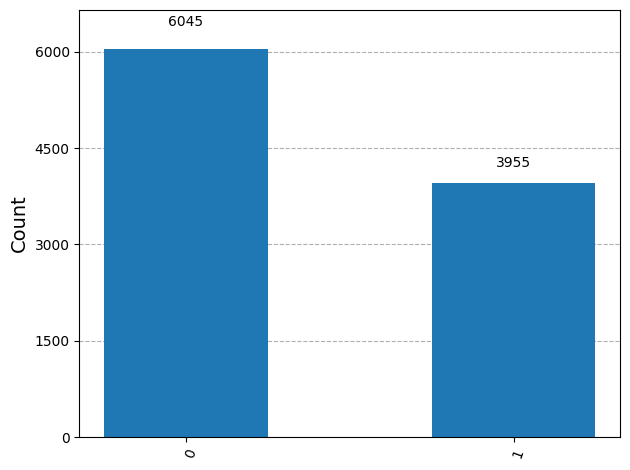

In [91]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Calculate rotation angle for state (√(3/5), √(2/5))
theta = 2 * np.arcsin(np.sqrt(2/5))

# Create circuit
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Prepare state
qc.ry(theta, 0)
qc.measure(0, 0)

# Run
simulator = AerSimulator()
num_shots = 10000
job = simulator.run(qc, shots=num_shots)
result = job.result()
counts = result.get_counts()

print(counts)

# Plot
plot_histogram(counts)

## Fifth experiment: Measuring different observables

So far we have only made measurements along the z axis. In a Stern-Gerlach experiment, if we wanted to measure along, say, the x-axis we would simply orient the inhomogeneous magnetic field to point along the $x$ axis, and look for deflections along $x$ on the screen. IBM quantum computers, however, are designed to make measurements along only one axis ($z$). To measure a state along $x$ we must perform a "change of basis". This means we must perform an operation that takes states along $x$ in the Bloch sphere to $z$, and vice-versa. There are a few ways of implementing this, but the preferred way is a Hadamard gate:

$$
H=\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}
$$

#### Check your understanding

Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Show that $H|0\rangle = |+\rangle_x$ and that $H|+\rangle_x = |0\rangle$
  </summary>

  **Answer:**

  $$
  H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} = |+\rangle_x
  $$

  $$
  H|+\rangle_x = \frac{1}{\sqrt(2)}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}2 \\ 0\end{pmatrix} = \begin{pmatrix}1 \\ 0\end{pmatrix} = |0\rangle
  $$
</details>

<details>
  <summary>
    Show that $H|1\rangle = |-\rangle_x$ and that $H|-\rangle_x = |1\rangle$
  </summary>

  **Answer:**

  $$
  H|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}0 \\ 1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} = |-\rangle_x
  $$

  $$
  H|-\rangle_x = \frac{1}{\sqrt(2)}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}0 \\ 2\end{pmatrix} = \begin{pmatrix}0 \\ 1\end{pmatrix} = |1\rangle
  $$
</details>



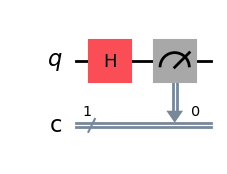

In [92]:
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add a hadamard gate to rotate into the x-basis
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

This circuit rotates our system so that measurements (along $z$) tell us about the $x$ characteristics prior to the rotation. We already know that the quantum computer initializes states to $|0\rangle$ which corresponds to $|\uparrow\rangle$. Let's see what happens when we measure the projection of spin along $x$ for a state initially in $|\uparrow\rangle$. We show this step on a simulator to encourage you to explore the statistics of other circuits with different initializations.



In [93]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler_sv = Sampler()

job = sampler_sv.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 4978, '0': 5022}


This shows us that for a qubit initially in $|0\rangle$ (or equivalently, a spin in the $|\uparrow\rangle$) the probability of measuring a projection along $+x$ or $-x$ is about 50-50. In some ways, this makes perfect sense. After all, if something were pointing along the z direction, it would have no particular preference for $\pm x$. We might expect the same to be true, if we start with the state $|1\rangle$ (or $|\downarrow\rangle$). Let's check:



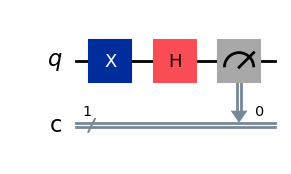

In [94]:
# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Add a NOT gate and hadamard gate. Measure.
qc.x(0)
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

In [95]:
job = sampler_sv.run([qc], shots=10000)
print(job.result()[0].data.c.get_counts())

{'1': 5026, '0': 4974}


Yes! Again, we find a 50-50 probability of measuring a projections along $\pm x$. In analogy with measurements along $z$, we might further suspect that a particle that collapses into a state definitely along $+x$ might have zero probability of subsequently being measured along $-x$. Let's check:



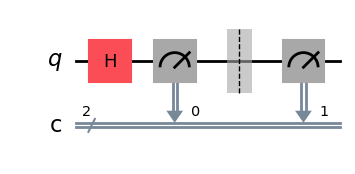

In [96]:
from qiskit import QuantumCircuit

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Rotate into x-basis using a Hadamard gate, then make two measurements in succession
qc.h(0)
qc.measure(0, 0)
qc.barrier()
qc.measure(0, 1)

qc.draw("mpl")

{'00': 509, '11': 515}


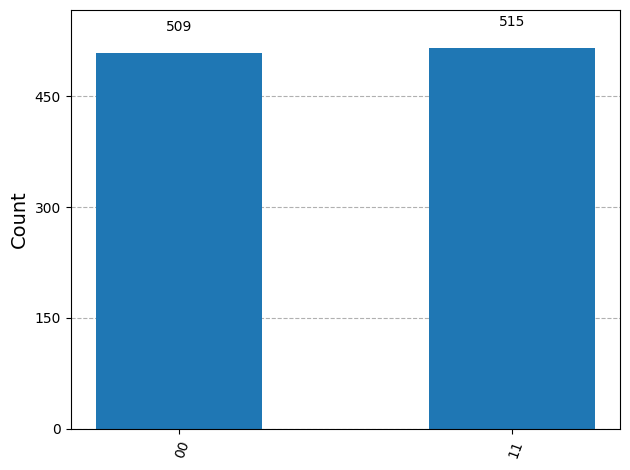

In [97]:
job = sampler_sv.run([qc])
print(job.result()[0].data.c.get_counts())
plot_histogram(job.result()[0].data.c.get_counts())

As expected, we obtain results in which the projection is along $+x$, and then later is again along $+x$, and we have results in which the projection is initially along $-x$ and is later along $-x$ once again. We do not see cases where the projection switches from $+x$ to $-x$ or vice-versa. We can collect our observations and use them to develop further operators in matrix forms, and further state vectors.

We know:

*   States with definite projections along $+z$ or $-z$ have a 50% chance of being found to have a projection along $+x$ and 50% chance of having a projection along $-x$.
*   States with a definite projection along $+x$ have zero chance of later being found to have a projection along $-x$, and vice-versa.

We can use these results to construct states with a definite, positive projection along $x$ (which we call $|+x\rangle$), and those with definite, negative projection along $x$ (which we call $|-x\rangle$). From those states, we can construct the matrix corresponding to $S_x$, exactly as we did for $S_z$. We leave these as exercises to the learner. Similarly, one can construct experiments making measurements along the $y$ axis, determine vectors for $|+y\rangle$ and $|-y\rangle$, and finally obtain an expression for $S_y$.

Collecting all these vectors and matrices together, we have

$$
\begin{aligned}
|+x\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix} & \:  & |-x\rangle &=& \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix} & \: &S_x &=& \frac{\hbar}{2} \begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}\\
|+y\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix} & \:  & |-y\rangle &=& \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -i\end{pmatrix} & \: &S_y &=& \frac{\hbar}{2} \begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}\\
|+z\rangle &= \begin{pmatrix}1 \\ 0\end{pmatrix} & \:  &|-z\rangle &=& \begin{pmatrix}0 \\ 1\end{pmatrix} & \: &S_z &=& \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}\\
\end{aligned}
$$



## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts:

*   For spin-1/2 particle, a measurement of the projection of spin on some axis can only yield one of two outcomes, often called "up" and "down".
*   Qubits can only be measured in one of two states, often referred to as $|0\rangle$ and $|1\rangle$.
*   We can model the Stern-Gerlach experiment on spin-1/2 particles using qubits in a quantum computer.
*   Repeated measurements of the same physical observable of the same particle/qubit will yield the same result (unless the system is perturbed by noise).
*   We can use results from the Stern-Gerlach experiment or from the analogous experiments with quantum computers to derive a system of state vectors and matrix operators that describe quantum mechanical spin.

### T/F questions:

1.  T/F Starting from experimental observations, the only valid choice for a vector to represent $|\uparrow\rangle$ is $\begin{pmatrix}1 \\ 0\end{pmatrix}$

No, any vector that satisfy your needs can be used. this one is the simplest one.

2.  T/F If $|\uparrow\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}$, the only choice for $|\downarrow\rangle$ is $\begin{pmatrix}0 \\ 1\end{pmatrix}$ (up to a global phase).

Yes, as they form an orthornormal pair.

3.  T/F A particle measured to be in the state $|0\rangle$ will continue to be found in the state $|0\rangle$ upon subsequent measurements along $z$.

True

4.  T/F A particle measured to be in the state $|0\rangle$ will continue to be found in the state $|0\rangle$ upon subsequent measurements along $x$.

False, 50:50

5.  T/F A particle measured to be in the state $|0\rangle$ will always be found in the state $|+\rangle_x$ upon subsequent measurements along $x$.

False, 50:50

### MC questions:

1.  A particle initially in $|\uparrow\rangle$ has what probability of being measured in the state $|+x\rangle$?
    *   a. 0%
    *   b. 25%
    *   c. 50%
    *   d. 71%
    *   e. 100%

c

2.  A particle initially in $|\uparrow\rangle$ has what probability of being measured in the state $|\downarrow\rangle$?
    *   a. 0%
    *   b. 25%
    *   c. 50%
    *   d. 71%
    *   e. 100%

a

3.  The state $|\uparrow\rangle$ of a spin-1/2 particle is most commonly associated with what quantum computing state?
    *   a. $|+\rangle$
    *   b. $|-\rangle$
    *   c. $|0\rangle$
    *   d. $|1\rangle$
    *   e. None of the above

c

### Discussion questions:

1.  Three friends are discussing quantum measurements and operators. Friend A says, "Making a measurement along $z$ and acting with the operator $\sigma_z$ are the same thing." Friend B says, "Well, they are different procedures, but they have the same result." Friend C says, "They are totally different; they even have different effects on most states." With whom do you agree and why?

obviously, c is more correct. a is wrong as the measurement and acting of operator will not be the same. One is determined and measurment is a probability result. It is important to notice that:

Operator action is reversible and unitary; measurement is irreversible and non-unitary (wavefunction collapse)

### Free response problems:

1.  Given the experimental observations and proposed syntax:

$P_{\uparrow+x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2} $
$P_{\downarrow+x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2} $

show that up to a global phase

$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\alpha}\end{pmatrix}$

Choose $\alpha = 0$ to obtain the standard result.

2.  Given the experimental observations and proposed syntax:

$P_{\uparrow-x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2} $
$P_{\downarrow-x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2} $

And using the result from challenge problem 3:

$P_{+x-x}=\vert \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = \frac{1}{2}|c+d|^2 =0 $

show that up to a global phase

$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$




## 1: Deriving |+⟩ₓ

### Given:
- $P_{\uparrow+x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |a|^2 =\frac{1}{2}$
- $P_{\downarrow+x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}a \\ b\end{pmatrix}\vert^2 = |b|^2 =\frac{1}{2}$

### Solution:

Let $|+\rangle_x = \begin{pmatrix}a \\ b\end{pmatrix}$

#### Step 1: Determine magnitudes

From the probabilities:
- $|a|^2 = \frac{1}{2}$ → $|a| = \frac{1}{\sqrt{2}}$
- $|b|^2 = \frac{1}{2}$ → $|b| = \frac{1}{\sqrt{2}}$

Check normalization: $|a|^2 + |b|^2 = \frac{1}{2} + \frac{1}{2} = 1$ ✓

#### Step 2: Write general form with phases

Since complex numbers with magnitude $\frac{1}{\sqrt{2}}$ can be written as $\frac{1}{\sqrt{2}}e^{i\phi}$:
- $a = \frac{1}{\sqrt{2}}e^{i\phi_1}$
- $b = \frac{1}{\sqrt{2}}e^{i\phi_2}$

So: $|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}e^{i\phi_1} \\ e^{i\phi_2}\end{pmatrix}$

#### Step 3: Factor out global phase

Factor out $e^{i\phi_1}$:

$$|+\rangle_x = \frac{e^{i\phi_1}}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i(\phi_2-\phi_1)}\end{pmatrix}$$

#### Step 4: Drop global phase

Since global phases are unobservable, define $\alpha = \phi_2 - \phi_1$:

$$\boxed{|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\alpha}\end{pmatrix}}$$

#### Step 5: Standard choice

Choosing $\alpha = 0$ gives: 

$$|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$$

---

## 2: Deriving |-⟩ₓ

### Given:
- $P_{\uparrow-x}=\vert \begin{pmatrix}1 & 0\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = |c|^2 =\frac{1}{2}$
- $P_{\downarrow-x}=\vert \begin{pmatrix}0 & 1\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = |d|^2 =\frac{1}{2}$
- $P_{+x-x}=\vert \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\end{pmatrix}\begin{pmatrix}c \\ d\end{pmatrix}\vert^2 = \frac{1}{2}|c+d|^2 =0$

### Solution:

Let $|-\rangle_x = \begin{pmatrix}c \\ d\end{pmatrix}$

#### Step 1: From probabilities (same as Problem 1)

Up to a global phase:

$$|-\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\beta}\end{pmatrix}$$

#### Step 2: Use orthogonality constraint

The condition $P_{+x-x} = 0$ means these states are **orthogonal**:

$$\langle +x|-x\rangle = 0$$

From Problem 1 (with $\alpha = 0$): $|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$

#### Step 3: Calculate inner product

$$\langle +x|-x\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\end{pmatrix} \cdot \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\beta}\end{pmatrix} = 0$$

$$\frac{1}{2}(1 \cdot 1 + 1 \cdot e^{i\beta}) = 0$$

$$\frac{1}{2}(1 + e^{i\beta}) = 0$$

#### Step 4: Solve for β

$$1 + e^{i\beta} = 0$$

$$e^{i\beta} = -1$$

$$\beta = \pi$$

#### Step 5: Final result

$$\boxed{|-\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ e^{i\pi}\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}}$$

---

## Key Insight

The **orthogonality condition** from the experimental observation (probability = 0) uniquely determines the **relative phase** between the components, giving us the standard x-basis states:

- $|+\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$

- $|-\rangle_x = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$

These form an orthonormal basis for spin measurements along the x-axis.


# 2025/10/23

# Exploring uncertainty


## Introduction

For those variables the constraint on uncertainty is written
$\Delta x \Delta p_x \geq \frac{\hbar}{2}.$
Here, $\Delta x$ is called the "uncertainty in $x$", which has the same definition as standard deviation in statistics, and can be defined as
$\Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}.$
$\Delta p_x$ is defined in the same way.
Here, we will not derive this uncertainty relation; we will point out that it is consistent with our understanding of classical waves. 

That is, a wave with truly one perfect frequency $f$ and wavelength $\lambda$ would go on and on forever as a perfect sinusoid. Quantum mechanically, this would correspond to knowing the momentum perfectly according to de Broglie's hypothesis: $\lambda = h/p$. But in order to know $where$ a wave-like particle is located, the wave describing it must become more sharply peaked in space, like a very narrow Gaussian, for example. We know that we can express any continuous function, including such sharply-peaked wave functions, as a Fourier series of sinusoidal functions with different wavelengths. But as the wave function becomes more sharply peaked (and the position is better known), we will require more terms in the Fourier series, meaning a mixture of more wavelengths (and thus, quantum mechanically, more values of momentum).

Stated more simply: a state with a well-defined momentum (a perfect sinusoid in space) has very uncertain position. A state with a well-defined position (like a Dirac delta distribution) has a very uncertain momentum.

There are other variables that exhibit such incompatibility. For example, a particle's spin may have a well-defined projection along one axis, but then we know nothing about the project on an orthogonal axis. For example the state $|0\rangle \sim |\uparrow\rangle$ (for a qubit or spin-1/2 particle) has a definite projection along the $z$ axis (of 1 in the context of a qubit, and of $\hbar/2$ in the context of a spin-1/2 particle). But this state can be written as a superposition of two states each of which has a well-defined projection onto the $x$ axis:
$|0\rangle = \frac{1}{\sqrt{2}}(|+\rangle_x+|-\rangle_x)$
or equivalently
$\begin{pmatrix} 1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1\end{pmatrix}+\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1\end{pmatrix}\right].$
$|+\rangle_x$ has a well-defined projection onto $x$, as does $|-\rangle_x$. So if we specify the projection of a state along the $x$ axis, we do not know the projection along the $z$ axis. And if we specify the projection on the $z$ axis, we don't know the projection along $x$. There are minor differences when discussing this in the context of spin and in qubits. But generally speaking, eigenstates of the Pauli matrices have an interesting relationship that we can explore.



## Simple check of intuition

In this first experiment and throughout the module, we will use a framework for quantum computing known as "Qiskit patterns", which breaks workflows into the following steps:

*   Step 1: Map classical inputs to a quantum problem
*   Step 2: Optimize problem for quantum execution
*   Step 3: Execute using Qiskit Runtime Primitives
*   Step 4: Post-processing and classical analysis

We will generally follow these steps, though we may not always explicitly label them.

Let's start by loading some necessary packages including Runtime primitives. We will also select the least-busy quantum computer available to us.



In [3]:
from numpy import pi

# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

# Load the Runtime primitive and session
from qiskit_ibm_runtime import (
    Batch,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)

# Use the least busy backend
backend = service.least_busy(min_num_qubits=127)
print(backend.name)

management.get:WARNING:2025-10-23 18:25:54,355: Loading default saved account


ibm_torino


In [4]:
# Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
from qiskit_aer.primitives import SamplerV2, EstimatorV2
from qiskit_aer.noise import NoiseModel

# Generate the noise model from the backend properties
noise_model = NoiseModel.from_backend(backend)

noisy_sampler = SamplerV2(options={"backend_options": {"noise_model": noise_model}})
noisy_estimator = EstimatorV2(options={"backend_options": {"noise_model": noise_model}})

You might recall that an eigenstate of one operator, Z, is not an eigenstate of another operator X. We will observe that now, experimentally by making measurements along the $x$ and $z$ axes. For the measurement along $z$, we simply use `qc.measure()`, because IBM quantum computers are structured to measure along $z$. But to measure along $x$, we must rotate the system to effectively move the $x$ axis up to the orientation along which we measure. This is accomplished with a Hadamard gate. There is a similar step required for measurements along $y$. The necessary steps are collected here for convenience:

*   To measure along $z$: `qc.measure()`
*   To measure along $x$: `qc.h()` then `qc.measure()`
*   To measure along $y$: `qc.sdg()`, `qc.h()`, `qc.s`then `qc.measure()`

### Step 1: Map classical inputs to a quantum problem

In this case, the mapping step is simply expressing the measurements and rotations described above in a quantum circuit:



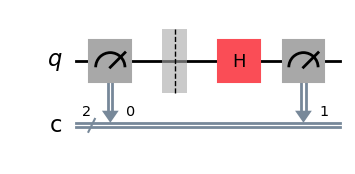

In [5]:
# Step 1: Map

# Import some general packages
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Add a first measurement
qc.measure(qr, cr[0])
qc.barrier()

# Change basis so that measurements made on quantum computer which normally tell us about z, now tell us about x.
qc.h(qr)

# Add a second measurement
qc.measure(qr, cr[1])

qc.draw("mpl")

### Step 2: Optimize problem for quantum execution

This step takes the operations we want to perform and expresses them in terms of the functionality of a specific quantum computer. It also maps our problem onto the layout of the quantum computer.



In [6]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

### Step 3: Execute using Qiskit Runtime primitives

We can use sampler to collect statistics on the measurements. We will construct the Sampler primitive to run on a real quantum computer using `mode = backend`. There are other modes for other workflows, and we will use one below. Sampler will be used by calling its run() method with a list of "pubs" (Primitive Unified Blocs). Each pub contains up to three values that, together, define a computation unit of work for the estimator to complete: circuits, observables, parameters. You can also provide a list of circuits, a list of observables, and a list of parameters. For more information, read the [Overview of PUBs.](/docs/guides/primitive-input-output#overview-of-pubs)

We want to run on a real quantum computer, so that we are carrying out a real quantum physics experiment. If you exhaust your allotted time on real quantum computers, you can comment out the code below for the quantum computer, and uncomment the code for running on a simulator.



In [9]:
# Step 3: Run the job on a real quantum computer
sampler = Sampler(mode=backend)
# pubs = [qc_isa]
# job = sampler.run(pubs)
# res = job.result()

# counts = res[0].data.c.get_counts()

# Run the job on the Aer simulator with noise model from real backend

sim_job = noisy_sampler.run([qc_isa])
sim_res=sim_job.result()
sim_counts=sim_res[0].data.c.get_counts()

### Step 4: Post-processing

This is an especially simple case of post-processing, in which we simply visualize the counts.

Note that Qiskit orders qubits, measurements, and other things by listing the lowest-numbered item last / on the right, a convention referred to as "little-endian". This means that the column below labeled "10" refers to counts where the first measurement yielded a "0", and the second measurements yielded a "1".



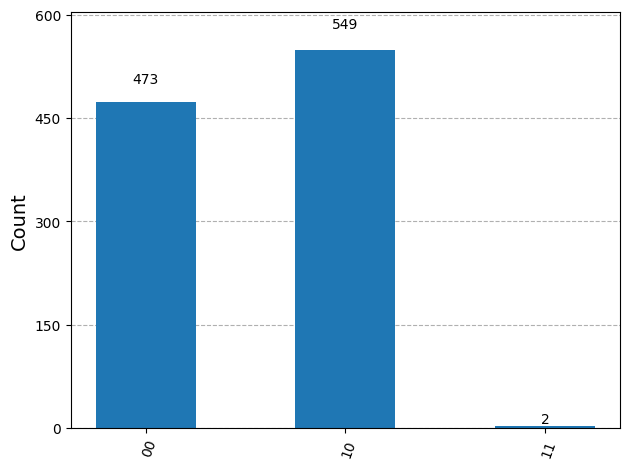

In [10]:
# Step 4: Post-process

from qiskit.visualization import plot_histogram

# plot_histogram(counts)
plot_histogram(sim_counts)

If this convention does not appeal to you, you can use `marginal_counts` to visualize the results of each measurement separately:



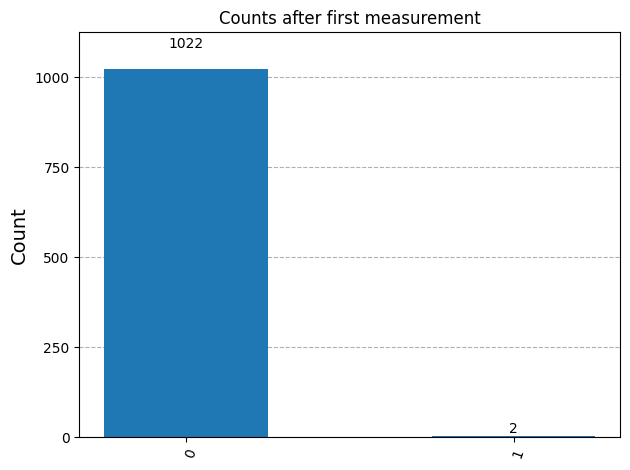

In [12]:
from qiskit.result import marginal_counts

plot_histogram(
    marginal_counts(sim_counts, indices=[0]), title="Counts after first measurement"
)

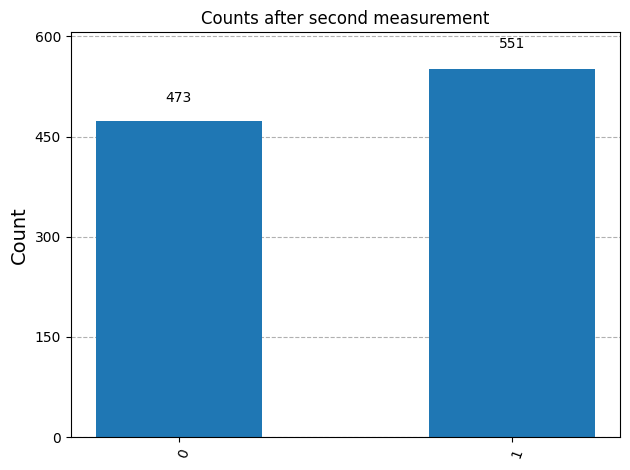

In [13]:
plot_histogram(
    marginal_counts(sim_counts, indices=[1]), title="Counts after second measurement"
)

By default, states in Qiskit are initialized to the $|0\rangle$ state. So it is no surprise that almost all of the first measurements yeilded $|0\rangle$. Note however, that there was almost an even split in the second measurement (the one giving information about projections of the state onto $x$). It seems like this state that gives us a very predictable outcome of measurements along $z$ gives us a very unpredictable set of outcomes for measurements along $x$. Let's explore this.

What happens if the make the measurements in the opposite order? We could start by using the Hadamard gate to obtain statistics on the probability of $|0\rangle$ being measured in $|\pm\rangle_x$. Then for the second measurement, we will change back to the $z$ basis using a second Hadamard gate.



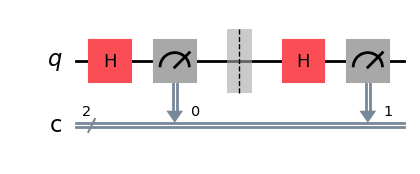

In [14]:
# Step 1:

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

# Change basis to measure along x.
qc.h(qr)
qc.measure(qr, cr[0])
qc.barrier()

# Change our basis back to z and make a second measurement
qc.h(qr)
qc.measure(qr, cr[1])

qc.draw("mpl")

In [15]:
# Step 2: Transpile the circuit for running on a quantum computer

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

In [18]:
# Run the job on the Aer simulator with noise model from real backend
job = noisy_sampler.run([qc_isa])
res=job.result()
counts=res[0].data.c.get_counts()

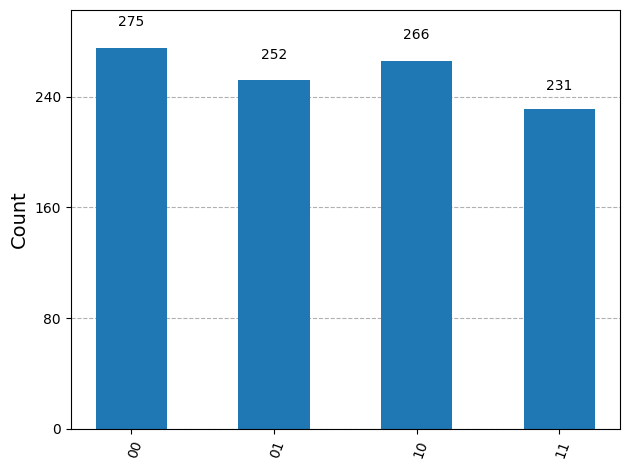

In [19]:
# Step 4: Post-process
from qiskit.visualization import plot_histogram

plot_histogram(counts)

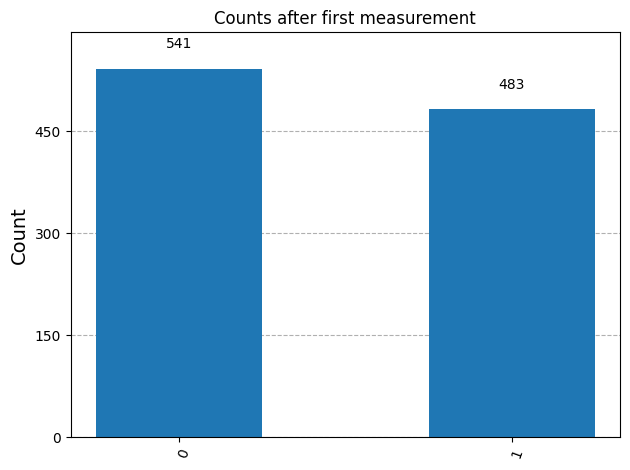

In [20]:
plot_histogram(
    marginal_counts(counts, indices=[0]), title="Counts after first measurement"
)

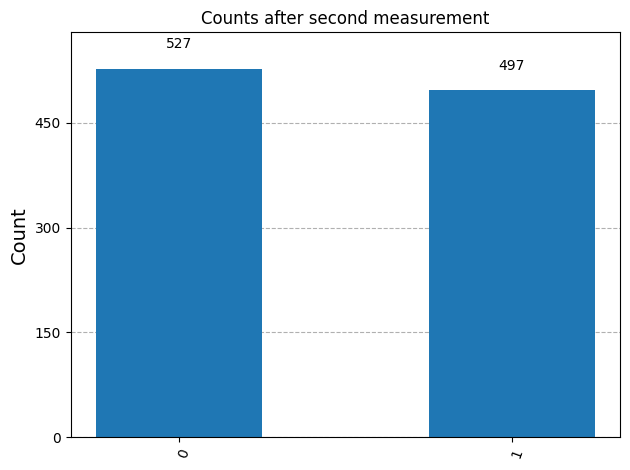

In [21]:
plot_histogram(
    marginal_counts(counts, indices=[1]), title="Counts after second measurement"
)

Here, we seem to have even less predictability! Previously, we at least knew what the outcome would be of the first measurement, now we have a fairly even distribution across all possible states. It's not too hard to see why this happened. We started in $|0\rangle$, which is a 50-50 mixture of $|+\rangle_x$ and $|-\rangle_x$, according to
$|0\rangle=\frac{1}{\sqrt{2}}(|+\rangle_x+|-\rangle_x)$
So clearly there should be equal probability of obtaining the + or - state (mapped to 0 and 1 in the chart) for the first measurement. The measurement along $x$ collapses the state into either an eigenstate $|+\rangle_x$ or the eigenstate $|-\rangle_x$. Each one of those states is a 50-50 mixture of $|0\rangle$ and $|1\rangle$, according to
$|+\rangle_x = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$
$|-\rangle_x = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
So once the system is in an eigenstate of $x$, clearly, measurements along $z$ will yield both $|0\rangle$ and $|1\rangle$, and will do so with roughly equal probability.
So our first example showed us that some states will have very predictable outcomes of some measurements, but unpredictable outcomes for other measurements. The current example shows us that we can do worse than that. There are states that can give us unpredictable outcomes for both measurements, even if all we do is swap the order of the measurements. Let's investigate how certain or uncertain a quantity is for a given state.



## Calculating uncertainty

We can quantify this using uncertainty, or variance. The "uncertainty" is often defined to be the square root of the "variance" of a distribution. That is, the uncertainty for some observable $S$ is denoted $\Delta S$ and is given by

$$
\begin{aligned}
(\Delta S)^2 & \equiv \langle (S - \langle S \rangle)^2 \rangle\\
(\Delta S)^2 & = \langle S^2 - 2S\langle S \rangle + \langle S \rangle^2 \rangle\\
(\Delta S)^2 & = \langle S^2 \rangle - \langle S \rangle^2
\end{aligned}
$$

For the case of Pauli matrices, for which $S^2 = I$, this becomes

$$
(\Delta S)^2 = 1 - \langle S \rangle^2
$$

Let's apply this to a concrete example. Let's start with the state $|\psi\rangle = |+\rangle_y = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ i \end{pmatrix},$ and let's determine the uncertainty of the observable $X$ in that state.

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.
Calculate the uncertainty of $X$ in the state $|+\rangle_y = |+i\rangle$, by hand.

Although not mentioned here, I believe that the $X$ here refers to the puli X, which can be expressed as: $$ \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\ $$

where the uncertainty is expressed as follwoing:
  $$
  \Delta X =\sqrt{\langle+i| X^2 |+i\rangle - \langle+i| X |+i\rangle^2}
  $$

by subsitute the state:

$$
\begin{aligned}
\Delta X & =\sqrt{\frac{1}{\sqrt{2}}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{\sqrt{2}}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix}\right)^2}\\
\Delta X & =\sqrt{\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix} \begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}i \\ 1\end{pmatrix}\right)^2}\\
\Delta X & =\sqrt{\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{2}(0)\right)^2}\\
\Delta X & =\sqrt{\frac{1}{2}(2)} = 1
\end{aligned}
$$
  

We can create an arbitrary initial state using `qc.initialize()`. Note that the syntax for the imaginary unit here is $1j$.



In [25]:
# Step 1: Map the problem into a quantum circuit

from qiskit.quantum_info import SparsePauliOp
import numpy as np

obs = SparsePauliOp("X")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the state
qc.initialize([1, 1j] / np.sqrt(2))

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend
job = noisy_estimator.run([[qc_isa,obs_isa]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

-1.2243379746351218e-16


According to our equation above,
$(\Delta X)^2 = 1 - \langle X \rangle^2 = 1-(0.0000000000000000000001)^2 \rightarrow \Delta X = 0.999...$
Let's stick with that same state, but find the expectation value of $Z$, now:



In [26]:
# Step 1: Map the problem into a quantum circuit

obs = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the state to |+>_y
qc.initialize([1, 1j] / np.sqrt(2))


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend
job = noisy_estimator.run([[qc_isa,obs_isa]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

0.00011547933160377388


We could do the same math as before, but we would see that the variance is again very close to 1.0. We could conclude that $\Delta X \Delta Z \approx 1.0$. Indeed this approximately correct for the state we chose. But can we do better? Or worse?

Recall that there is an uncertainty relation between position along one direction, $x,$ and momentum along the same direction, $p_x.$ For those variables, but most familiar form is probably
$\Delta x \Delta p_x \geq \hbar/2$
If this is all we remember, we might be tempted to think that $\Delta X$ and $\Delta Z$ could also have such a fundamental limit on uncertainty. Perhaps it is impossible for the product $\Delta X \Delta Z$ to reach zero? Let's try another state and see if this holds. This time, we'll use $|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}.$ Let's see what happens. Note that in the code below, estimator can accept two sets of circuits and observables in the same job submission.



In [28]:
# Step 1: Map the problem into a quantum circuit

obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Z")

# Define registers

qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Initialize the state
qc.initialize([1, 1] / np.sqrt(2))

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([[qc,obs1],[qc,obs2]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.

print("The expectation value of the first observable is: ", res[0].data.evs)
print("The expectation value of the second observable is: ", res[1].data.evs)

The expectation value of the first observable is:  0.9999999999999998
The expectation value of the second observable is:  0.0


The expectation value of $X$ should be close to 1.0, but should not exceed 1.0. Don't worry if it exceeds 1.0 by a very small amount. This can be attributed to factors like noise and/or readout error. Although this is a very important topic, we can ignore it for now.

We obtained an expectation value of $X$ that is very close to 1.0 (corresponding to a very low variance for $X$). This makes the product of the two variances quite low:

$$
\Delta X \Delta Z = \sqrt{1-(0.9853)^2} \times \sqrt{1-(-0.00195)^2} = 0.171.
$$

While this is not exactly zero, this value is getting small in comparison with the eigenvalues of the Pauli operators ($\pm 1$). Well, you may recall that the uncertainty relation between linear position and momentum could be written differently, explicitly using the commutation relation between the operators $x$ and $p_x$:

$$
\Delta x \Delta p_x \geq \frac{1}{2}|\langle [x,p_x] \rangle|
$$

where

$$
[x,p_x] = xp_x-p_xx
$$

is the commutator of $x$ and $p_x$.

This is the form that that can be most easily extended to the Pauli operators. Generally, for two operators $A$ and $B$,

$$
\Delta A \Delta B \geq \frac{1}{2}|\langle [A,B] \rangle|.
$$

And in the case of the Pauli matrices $X$ and $Z$, we need $[X,Z]$ in order to calculate

$$
\Delta X \Delta Z \geq \frac{1}{2}|\langle [X,Z] \rangle|.
$$

We show this here, and leave similar calculations to the reader as an exercise:

$$
[X,Z] = XZ-ZX = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}-\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}
$$

$$
[X,Z] = \begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}-\begin{pmatrix}0 & 1 \\ -1 & 0\end{pmatrix} = 2\begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}
$$

This is a perfectly acceptable answer, but with one more step, we see

$$
[X,Z] = -2i\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}=-2iY
$$

Our uncertainty relation thus becomes

$$
\Delta X \Delta Z \geq |\langle Y \rangle|.
$$

#### Check your understanding

Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
  <summary>
    Determine $[X,Y]$ and $[Y,Z]$. Use this to write down the uncertainty relations between $X$ & $Y$, and $Y$ & $Z$.
  </summary>

  **Answer:**

  $$
  [X,Y] = XY-YX = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}-\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} = 2 \begin{pmatrix}i & 0 \\ 0 & -i\end{pmatrix}=2iZ
  $$

  $$
  [Y,Z] = YZ-ZY = \begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}-\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix} = 2 \begin{pmatrix}0 & i \\ i & 0\end{pmatrix}=2iX
  $$

  Combining with the general uncertainty relation, we have

  $$
  \Delta X \Delta Y \geq |\langle Z \rangle|,
  $$

  $$
  \Delta Y \Delta Z \geq |\langle X \rangle|.
  $$
</details>

### Verify consistency

Before moving on, let us check that this was consistent with our previous finding. We used the state $|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}.$ And we found that $\Delta X \Delta Z  = 0.171.$ Now we know this product should be greater than or equal to

$$
|\langle Y \rangle|=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

$$
|\langle Y \rangle| = \frac{1}{2}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} -i \\ i \end{pmatrix} = \frac{1}{2}(-i+i) = 0.
$$

So indeed, $\Delta X \Delta Z  = 0.171 \geq |\langle Y \rangle|=0$



Use the questions below to build some intuition for these findings:

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Answer the following items together as a set:

    (a) What states would you expect to have zero uncertainty in $X$?

    (b) What states would you expect to have zero uncertainty in $Z$?

    (c) In what states would you obtain a zero expectation value $\langle Y \rangle$?

    (d) Are the answers to the above questions consistent with the case $\Delta X \Delta Z \geq |\langle Y \rangle|$?

    (e) Write code to explicitly check this using estimator.
  </summary>

  **Answers:**

  (a) We might expect eigenstates of the $X$ operator to yield zero uncertainty in $X$. Indeed, using $|\psi\rangle = |+\rangle_x,$ we have
  $\Delta X = \sqrt{1-\langle X \rangle^2} = \sqrt{1-1^2} = 0.$

  (b) We might expect eigenstates of the $Z$ operator to yield zero uncertainty in $Z$. Indeed, using $|\psi\rangle = |1\rangle,$ we have
  $\Delta Z = \sqrt{1-\langle Z \rangle^2} = \sqrt{1-(-1)^2} = 0.$

  (c) We expect to find $\langle Y \rangle=0$ for any states that, when measured, yield a positive projection on the $y$ axis just as often as a negative projection. These include the eigenstates of $X$ and $Z$.

  (d) Yes. One would expect a very small value for the product of uncertainties $\Delta X \Delta Z $ for eigenstates of $X$ or $Z$: $\Delta X \Delta Z \approx 0.$ This can hold because we would also expect $\langle Y \rangle=0$ for those same states. So the uncertainty relation could be satisfied.

  (e) Code such as the following would verify this:

  ```
  obs1 = SparsePauliOp.from_list(
      [("X", 1.000)]
  )
  obs2 = SparsePauliOp.from_list(
      [("Y", 1.000)]
  )
  obs3 = SparsePauliOp.from_list(
      [("Z", 1.000)]
  )
  qc = QuantumCircuit(1,1)
  qc.ry(pi/2,0)

  job = estimator.run([(qc, [[obs1], [obs2], [obs3]])], precision=0.001)
  res=job.result()
  ```

  Where the results returns all expectation values. To retrieve all expectation values and calculate uncertainties, we could use:

  ```
  xs=res[0].data.evs[0]
  ys=abs(res[0].data.evs[1])
  zs=res[0].data.evs[2]

  import math
  prodxz=((1-xs[i]*xs[i])**0.5)*(1-zs[i]*zs[i])**0.5

  ```
</details>

<details>
  <summary>
    Answer the following items together as a set:

    (a) Can you think of a state in which you would have a large expectation value $\langle Y \rangle$?

    (b) Would you expect that same state to have large or small uncertainty in $X$?

    (c) Would you expect that same state to have large or small uncertainty in $Z$?

    (d) Are the answers to the above questions consistent with the case $\Delta X \Delta Z \geq |\langle Y \rangle|$?

    (e) Write code to explicitly check this using estimator.
  </summary>

  **Answers:**

  (a) We expect to find $\langle Y \rangle\approx 1$ for the eigenstate of $Y$: $|+\rangle_y$.

  (b) We might expect $X$ to have large uncertainty in the state $|+\rangle_y,$ since measuring $X$ in that state would yield a positive and negative result with equal frequency/probability.

  (c) We might expect $Z$ to have large uncertainty in the state $|+\rangle_y,$ since measuring $Z$ in that state would yield a positive and negative result with equal frequency/probability.

  (d) Yes. One would expect a large value for the product of uncertainties $\Delta X \Delta Z $ for eigenstates of $Y,$ and for $|+\rangle_y,$ specifically. We would also expect $\langle Y \rangle\approx 1$ for that same state. So both $\langle Y \rangle$ and $\Delta X \Delta Z $ are both fairly large in this state, and it is plausible that the uncertainty relation could again be satisfied.

  (e) Code such as the following would verify this:

  ```
  obs1 = SparsePauliOp.from_list(
      [("X", 1.000)]
  )
  obs2 = SparsePauliOp.from_list(
      [("Y", 1.000)]
  )
  obs3 = SparsePauliOp.from_list(
      [("Z", 1.000)]
  )
  qc = QuantumCircuit(1,1)
  qc.rx(-pi/2,0)

  job = estimator.run([(qc, [[obs1], [obs2], [obs3]])], precision=0.001)
  res=job.result()
  ```

  Where the results returns all expectation values. To retrieve all expectation values and calculate uncertainties, we could use:

  ```
  xs=res[0].data.evs[0]
  ys=abs(res[0].data.evs[1])
  zs=res[0].data.evs[2]

  import math
  prodxz=((1-xs[i]*xs[i])**0.5)*(1-zs[i]*zs[i])**0.5

  ```
</details>



(a): X
(b): Z
(c): any states that is orthorgnal to Y, which includes the eigenstates of X and Z.
(d): Yes

In [36]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator
import numpy as np

estimator = StatevectorEstimator()

def verify_uncertainty(qc, name):
    """Verify ΔX·ΔZ ≥ |<Y>| for a quantum state"""
    # Define operators
    X, Y, Z = [SparsePauliOp.from_list([(op, 1.0)]) for op in ["X", "Y", "Z"]]
    I = SparsePauliOp.from_list([("I", 1.0)])
    
    # Get expectation values
    job = estimator.run([(qc, [X, Y, Z, I])])
    result = job.result()
    exp_X, exp_Y, exp_Z, exp_I = result[0].data.evs
    
    # Calculate uncertainties: ΔA = sqrt(<A²> - <A>²), and A² = I for Pauli matrices
    delta_X = np.sqrt(exp_I - exp_X**2)
    delta_Z = np.sqrt(exp_I - exp_Z**2)
    
    # Check relation
    product = delta_X * delta_Z
    bound = np.abs(exp_Y)
    satisfied = product >= bound - 1e-10
    
    print(f"{name:20s} | ΔX={delta_X:.3f}, ΔZ={delta_Z:.3f}, |<Y>|={bound:.3f} | ΔX·ΔZ={product:.3f} ≥ {bound:.3f}? {satisfied}")

# Test states
print("Eigenstates of X and Z (small <Y>, small ΔX or ΔZ):")
qc_plus = QuantumCircuit(1); qc_plus.h(0)
verify_uncertainty(qc_plus, "|+⟩ (X eigenstate)")

qc_zero = QuantumCircuit(1)
verify_uncertainty(qc_zero, "|0⟩ (Z eigenstate)")

print("\nEigenstates of Y (large <Y>, large ΔX and ΔZ):")
qc_plus_i = QuantumCircuit(1); qc_plus_i.h(0); qc_plus_i.s(0)
verify_uncertainty(qc_plus_i, "|+i⟩ (Y eigenstate)")

qc_minus_i = QuantumCircuit(1); qc_minus_i.h(0); qc_minus_i.sdg(0)
verify_uncertainty(qc_minus_i, "|-i⟩ (Y eigenstate)")

Eigenstates of X and Z (small <Y>, small ΔX or ΔZ):
|+⟩ (X eigenstate)   | ΔX=0.000, ΔZ=1.000, |<Y>|=0.000 | ΔX·ΔZ=0.000 ≥ 0.000? True
|0⟩ (Z eigenstate)   | ΔX=1.000, ΔZ=0.000, |<Y>|=0.000 | ΔX·ΔZ=0.000 ≥ 0.000? True

Eigenstates of Y (large <Y>, large ΔX and ΔZ):
|+i⟩ (Y eigenstate)  | ΔX=1.000, ΔZ=1.000, |<Y>|=1.000 | ΔX·ΔZ=1.000 ≥ 1.000? True
|-i⟩ (Y eigenstate)  | ΔX=1.000, ΔZ=1.000, |<Y>|=1.000 | ΔX·ΔZ=1.000 ≥ 1.000? True


(a): the eigenstate of Y will have a expectional value of 1

(b) (c): 0 expection value, large uncertainty.

(d): yes

In [39]:
# the following code aims to support question (e)

estimator = StatevectorEstimator()

def analyze_state(qc, name):
    """Analyze expectation values and uncertainties for a quantum state"""
    X, Y, Z = [SparsePauliOp.from_list([(op, 1.0)]) for op in ["X", "Y", "Z"]]
    I = SparsePauliOp.from_list([("I", 1.0)])
    
    job = estimator.run([(qc, [X, Y, Z, I])])
    result = job.result()
    exp_X, exp_Y, exp_Z, exp_I = result[0].data.evs
    
    delta_X = np.sqrt(exp_I - exp_X**2)
    delta_Z = np.sqrt(exp_I - exp_Z**2)
    product = delta_X * delta_Z
    bound = np.abs(exp_Y)
    
    print(f"\nState: {name}")
    print(f"  <Y> = {exp_Y:.3f}")
    print(f"  ΔX = {delta_X:.3f} (uncertainty in X)")
    print(f"  ΔZ = {delta_Z:.3f} (uncertainty in Z)")
    print(f"  ΔX·ΔZ = {product:.3f}")
    print(f"  |<Y>| = {bound:.3f}")
    print(f"  Relation satisfied? ΔX·ΔZ ≥ |<Y>|: {product >= bound - 1e-10}")

print("="*60)
print("ANSWERS:")
print("="*60)

# (a) State with large <Y>: Eigenstate of Y
print("\n(a) State with large expectation value <Y>:")
print("    Answer: Eigenstate of Y, such as |+i⟩ or |-i⟩")

# Create |+i⟩ = (|0⟩ + i|1⟩)/√2
qc_plus_i = QuantumCircuit(1)
qc_plus_i.h(0)   # Hadamard
qc_plus_i.s(0)   # S gate
analyze_state(qc_plus_i, "|+i⟩ (Y eigenstate, eigenvalue +1)")

# Create |-i⟩ = (|0⟩ - i|1⟩)/√2
qc_minus_i = QuantumCircuit(1)
qc_minus_i.h(0)   # Hadamard
qc_minus_i.sdg(0) # S† gate
analyze_state(qc_minus_i, "|-i⟩ (Y eigenstate, eigenvalue -1)")

print("\n(b) Uncertainty in X for this state:")
print("    Answer: LARGE uncertainty")
print("    Reason: Y eigenstates are equal superpositions of X eigenstates")

print("\n(c) Uncertainty in Z for this state:")
print("    Answer: LARGE uncertainty")
print("    Reason: Y eigenstates are equal superpositions of Z eigenstates")

print("\n(d) Consistency with ΔX·ΔZ ≥ |<Y>|:")
print("    Answer: YES, consistent")
print("    Reason: Both ΔX and ΔZ are large (~1), so ΔX·ΔZ ≈ 1")
print("           |<Y>| is also large (= 1 for eigenstates)")
print("           The relation 1 ≥ 1 is satisfied")

print("\n(e) Code verification shown above")

ANSWERS:

(a) State with large expectation value <Y>:
    Answer: Eigenstate of Y, such as |+i⟩ or |-i⟩

State: |+i⟩ (Y eigenstate, eigenvalue +1)
  <Y> = 1.000
  ΔX = 1.000 (uncertainty in X)
  ΔZ = 1.000 (uncertainty in Z)
  ΔX·ΔZ = 1.000
  |<Y>| = 1.000
  Relation satisfied? ΔX·ΔZ ≥ |<Y>|: True

State: |-i⟩ (Y eigenstate, eigenvalue -1)
  <Y> = -1.000
  ΔX = 1.000 (uncertainty in X)
  ΔZ = 1.000 (uncertainty in Z)
  ΔX·ΔZ = 1.000
  |<Y>| = 1.000
  Relation satisfied? ΔX·ΔZ ≥ |<Y>|: True

(b) Uncertainty in X for this state:
    Answer: LARGE uncertainty
    Reason: Y eigenstates are equal superpositions of X eigenstates

(c) Uncertainty in Z for this state:
    Answer: LARGE uncertainty
    Reason: Y eigenstates are equal superpositions of Z eigenstates

(d) Consistency with ΔX·ΔZ ≥ |<Y>|:
    Answer: YES, consistent
    Reason: Both ΔX and ΔZ are large (~1), so ΔX·ΔZ ≈ 1
           |<Y>| is also large (= 1 for eigenstates)
           The relation 1 ≥ 1 is satisfied

(e) Code verifi

## Testing uncertainty relations

The test above only demonstrated the validity of the uncertainty relation for a single choice of state vector $|\psi\rangle = |+\rangle_x$. To convince ourselves that this is generally consistent with experiment, we should carry out similar calculations using estimator for many choices of the state vector. Let's start by rotating our state vector away from the $z$ axis, using an `RY` gate to produce different initial states using a parameter $\theta$.



In [40]:
# The calculation below uses approximately 3-4 minutes of QPU time.
# Step 1: Map the problem into a quantum circuit

from qiskit.circuit import Parameter
import numpy as np

# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0>
theta = Parameter("θ")
qc.ry(theta, 0)

params = np.linspace(0, 2, num=21)

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res=job.result()

In [41]:
# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = abs(res[0].data.evs[1])
zs = res[0].data.evs[2]

# Calculate uncertainties

delx = []
delz = []
prodxz = []
for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    delz.append(abs((1 - zs[i] * zs[i])) ** 0.5)
    prodxz.append(delx[i] * delz[i])

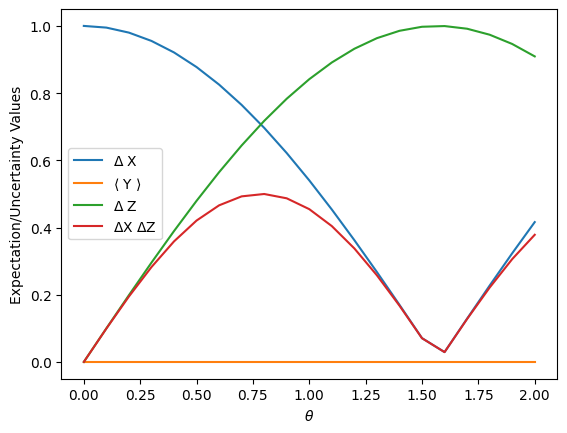

In [42]:
# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt

plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")
plt.plot(params, delz, label=r"$\Delta$ Z")
plt.plot(params, prodxz, label=r"$\Delta$X $\Delta$Z")
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

Note that the red curve $(\Delta X \Delta Z)$ is always greater than the orange curve $\langle Y \rangle.$ Sometimes the uncertainty product dips and is somewhat close to the limit, and other times it rises and is farther from the limit, but it always obeys the uncertainty relation.

Of course, this might not be the best test of the uncertainty relation, since our limit $\langle Y \rangle$ is always very close to zero. Let's use a quantum state that has a larger projection on eigenstates of $Y$. Specifically, we will still rotate rotate $|0\rangle$ down from the $z$ axis by varying angles, but now we will also rotate that resulting state around $z$ by some angle, perhaps $\pi/4$, and see what happens.



In [43]:
# The calculation below uses approximately 3-4 minutes of QPU time.
from qiskit.circuit import Parameter
import numpy as np

# Step 1: Map the problem to a quantum circuit

# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> along one plane, and then along a transverse direction.
theta = Parameter("θ")
qc.ry(theta, 0)
qc.rz(pi / 4, 0)

params = np.linspace(0, 2, num=21)

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res=job.result()

In [44]:
# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = abs(res[0].data.evs[1])
zs = res[0].data.evs[2]

# Calculate uncertainties

delx = []
delz = []
prodxz = []
for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    delz.append(abs((1 - zs[i] * zs[i])) ** 0.5)
    prodxz.append(delx[i] * delz[i])

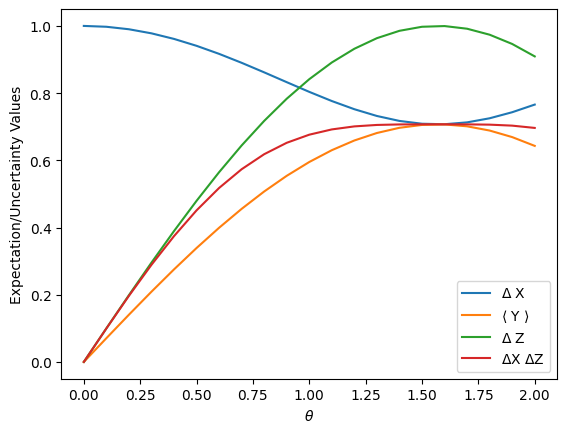

In [45]:
# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt

plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")
plt.plot(params, delz, label=r"$\Delta$ Z")
plt.plot(params, prodxz, label=r"$\Delta$X $\Delta$Z")
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

Now we see that the limit on the uncertainty $(\Delta X \Delta Z)$ is being put to the test! The red curve comes much closer to the orange curve than before. In fact, in the absence of noise, the uncertainty relation would be exactly saturated ($(\Delta X \Delta Z) = \langle Y \rangle$) one point. In the presence of noise and readout error, it should not be surprising if a run occassionally yields $(\Delta X \Delta Z)$ very slightly larger than $\langle Y \rangle.$ This is not a true violation of uncertainty; it is just an artifact of non-zero error.

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    Explain how you would push this to the absolute limit, making $\langle Y \rangle$ as large as possible?
  </summary>

  **Answer:**

  The code currently has lines that rotate the default initial state $|0\rangle$, down from the $z$ axis by some parametrized angle $\theta$ and then also around the $z$ axis by an angle $\pi/4,$ which rotates the state vector part of the way over to the $y$ axis.

  `qc.ry(theta,0)`

  `qc.rz(pi/4,0)`

  We could change the rotation about $z$ from $\pi/4$ to $\pi/2$, rotating all the way to an eigenstate of $Y$:

  `qc.ry(theta,0)`

  `qc.rz(pi/2,0)`

  No other changes would be required.
</details>

<details>
  <summary>
    Change the code or copy it over and implement that check of the uncertainty relation with the expectation value of Y maximized. Does the uncertainty relation hold?
  </summary>

  **Answer:**

  We would use exactly the code from the example above, with

  `qc.rz(pi/2,0)`

  swapped in to replace

  `qc.rz(pi/4,0).`

  The resulting figure should look like that below, and yes, the uncertainty principle should still be valid.

  ![A plot comparing uncertainty to the maximum expectation value of the Y operator.](/learning/images/modules/quantum-mechanics/exploring-uncertainty-with-qiskit/checkin.avif)
</details>



Q1: what we want is a full projection of Y, meaning that we hope that the state is fully on Y. Therefore, looking at the rotation, we could do the following: rotate it alone z by pi/2 instead of pi/4 would do the job.

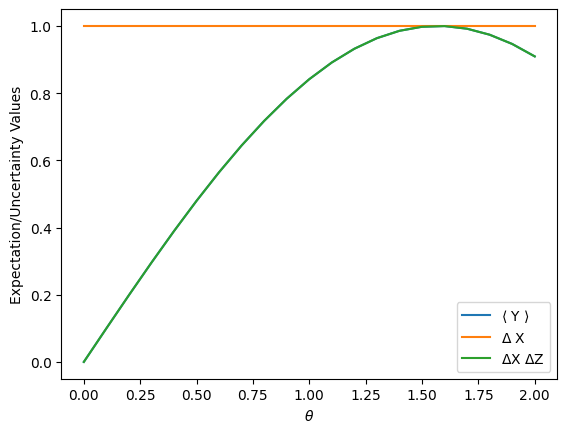

In [57]:
# The calculation below uses approximately 3-4 minutes of QPU time.
from qiskit.circuit import Parameter
import numpy as np

# Step 1: Map the problem to a quantum circuit

# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> along one plane, and then along a transverse direction.
theta = Parameter("θ")
qc.ry(theta, 0)
qc.rz(pi / 2, 0)

params = np.linspace(0, 2, num=21)

# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend

job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res=job.result()

# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = abs(res[0].data.evs[1])
zs = res[0].data.evs[2]

# Calculate uncertainties

delx = []
delz = []
prodxz = []
for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    delz.append(abs((1 - zs[i] * zs[i])) ** 0.5)
    prodxz.append(delx[i] * delz[i])

# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt

plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")
plt.plot(params, delz, label=r"$\Delta$ Z")
plt.plot(params, prodxz, label=r"$\Delta$X $\Delta$Z")
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

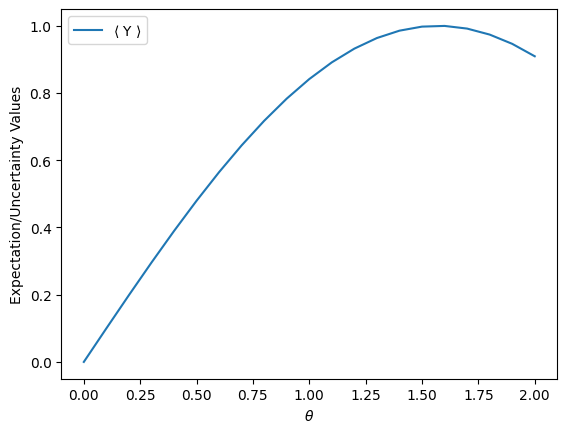

In [58]:
# Here we can plot the results from this simulation.
import matplotlib.pyplot as plt


plt.plot(params, ys, label=r"$\langle$ Y $\rangle$")

plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.show()

The reason for these two plots i that we could not see the expectation value of Y from the above plot while showing the delta X delta Z, as they overlap with eachother. (I used simulation so there may be some error source missing here). 

<details>
  <summary>
    Modify the code above to make a similar picture, demonstrating that from measurements on the quantum computer the product $\Delta X \Delta Y$ behaves as it should. Choose any set of states you like.
  </summary>

  **Answer:**

  We would use exactly the code from the example above, and in face we could use the same results from above, just using the expectation values to calculate different uncertainties. For example, we could use

  ```
  xs=res[0].data.evs[0]
  ys=res[0].data.evs[1]
  zs=abs(res[0].data.evs[2])
  import math
  delx = []
  dely = []
  prodxy=[]|
  for i in range(len(xs)):
      delx.append((1-xs[i]*xs[i])**0.5)
      dely.append((1-ys[i]*ys[i])**0.5)
      prodxy.append(((1-xs[i]*xs[i])**0.5)*(1-ys[i]*ys[i])**0.5)
  ```

  and we could plot

  ```
  import matplotlib.pyplot as plt
  plt.plot(params, delx, label=r'$\Delta$ X')
  plt.plot(params, dely, label=r'$\langle$ Y $\rangle$')
  plt.plot(params, zs, label=r'$\Delta$ Z')
  plt.plot(params, prodxy, label=r'$\Delta$X $\Delta$Z')
  plt.xlabel(r'$\theta$')
  plt.ylabel('Expectation/Uncertainty Values')
  plt.legend()
  plt.show()
  ```
</details>



<>:60: SyntaxWarning: invalid escape sequence '\D'
<>:60: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jackz\AppData\Local\Temp\ipykernel_37708\4180619481.py:60: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Uncertainty Relation: $\Delta X \Delta Y \geq |\langle Z \\rangle|/2$")


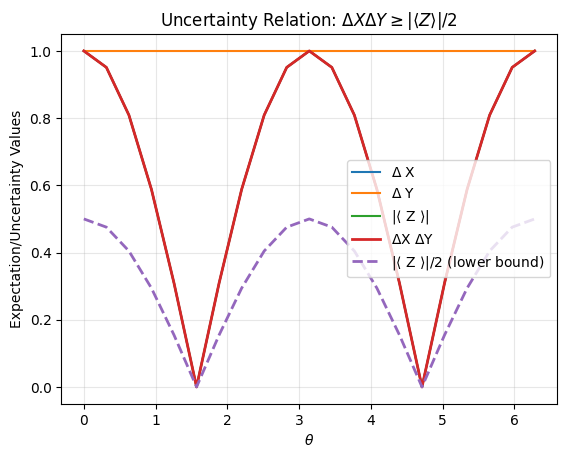

In [59]:
# The calculation below uses approximately 3-4 minutes of QPU time.
from qiskit.circuit import Parameter
import numpy as np

# Step 1: Map the problem to a quantum circuit
# Specify observables
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> along the Y-axis
theta = Parameter("θ")
qc.ry(theta, 0)

params = np.linspace(0, 2*np.pi, num=21)

# Step 2: Transpile the circuit
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job on the Aer simulator with noise model from real backend
job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [params])])
res = job.result()

# Step 4: Post-processing and classical analysis.
xs = res[0].data.evs[0]
ys = res[0].data.evs[1]
zs = abs(res[0].data.evs[2])

# Calculate uncertainties for X and Y
delx = []
dely = []
prodxy = []
lower_bound = []

for i in range(len(xs)):
    delx.append(abs((1 - xs[i] * xs[i])) ** 0.5)
    dely.append(abs((1 - ys[i] * ys[i])) ** 0.5)
    prodxy.append(delx[i] * dely[i])
    lower_bound.append(zs[i] / 2)  # Since [X,Y] = 2iZ, lower bound is |<Z>|/2

# Plot the results
import matplotlib.pyplot as plt
plt.plot(params, delx, label=r"$\Delta$ X")
plt.plot(params, dely, label=r"$\Delta$ Y")
plt.plot(params, zs, label=r"$|\langle$ Z $\rangle|$")
plt.plot(params, prodxy, label=r"$\Delta$X $\Delta$Y", linewidth=2)
plt.plot(params, lower_bound, '--', label=r"$|\langle$ Z $\rangle|$/2 (lower bound)", linewidth=2)
plt.xlabel(r"$\theta$")
plt.ylabel("Expectation/Uncertainty Values")
plt.legend()
plt.title("Uncertainty Relation: $\Delta X \Delta Y \geq |\langle Z \\rangle|/2$")
plt.grid(True, alpha=0.3)
plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\D'
<>:74: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jackz\AppData\Local\Temp\ipykernel_37708\1304375764.py:74: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_title('Uncertainty Relation: $\Delta X \Delta Z \geq |\\langle Y \\rangle|/2$')


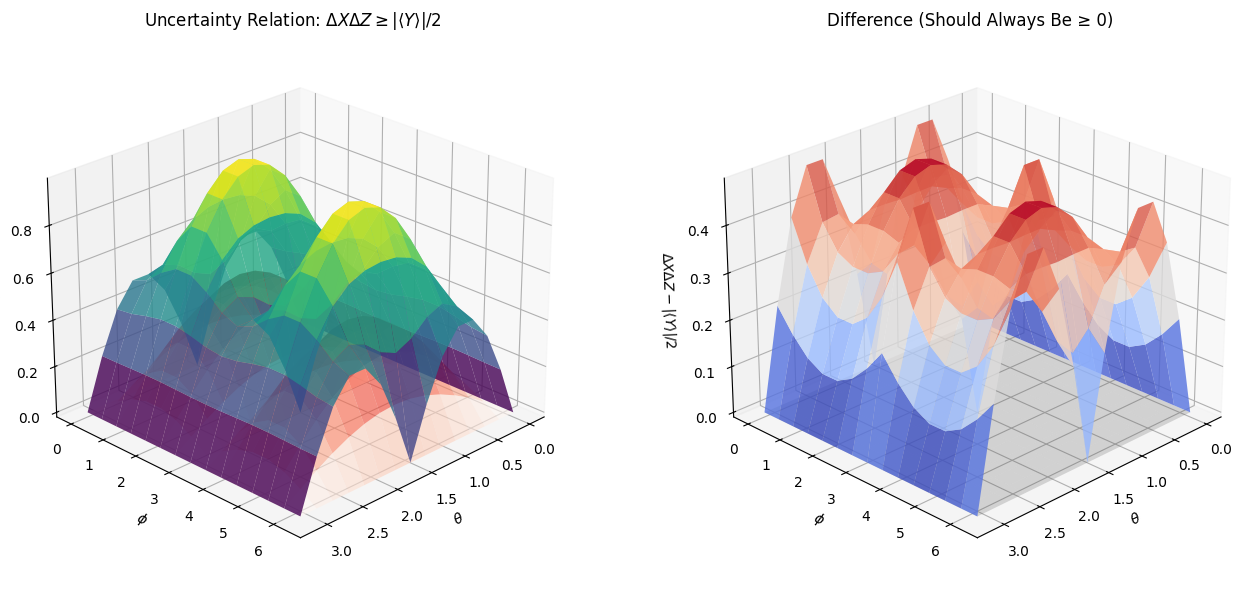

Minimum difference: -0.000000
Maximum difference: 0.487464
Uncertainty relation violated? False


In [61]:
# The calculation below uses more QPU time due to 2D parameter scan
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Map the problem to a quantum circuit
# Specify observables - using X, Y, Z
obs1 = SparsePauliOp("X")
obs2 = SparsePauliOp("Y")
obs3 = SparsePauliOp("Z")

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Create general state using two rotation angles
theta = Parameter("θ")
phi = Parameter("φ")
qc.ry(theta, 0)
qc.rz(phi, 0)

# Create 2D parameter grid
theta_vals = np.linspace(0, np.pi, num=15)
phi_vals = np.linspace(0, 2*np.pi, num=15)

# Create list of parameter combinations
param_list = []
for t in theta_vals:
    for p in phi_vals:
        param_list.append([t, p])

# Step 2: Transpile the circuit
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)

# Run the job
job = noisy_estimator.run([(qc, [[obs1], [obs2], [obs3]], [param_list])])
res = job.result()

# Step 4: Post-processing
xs = res[0].data.evs[0]
ys = res[0].data.evs[1]
zs = res[0].data.evs[2]

# Clip values to [-1, 1] to handle numerical errors
xs = np.clip(xs, -1, 1)
ys = np.clip(ys, -1, 1)
zs = np.clip(zs, -1, 1)

# Calculate uncertainties with absolute value to ensure positive arguments
delx = np.array([np.sqrt(abs(1 - x**2)) for x in xs]).reshape(len(theta_vals), len(phi_vals))
delz = np.array([np.sqrt(abs(1 - z**2)) for z in zs]).reshape(len(theta_vals), len(phi_vals))
prodxz = delx * delz
lower_bound = np.abs(ys).reshape(len(theta_vals), len(phi_vals)) / 2

# Create meshgrid for 3D plotting
THETA, PHI = np.meshgrid(theta_vals, phi_vals, indexing='ij')

# Create 3D plot
fig = plt.figure(figsize=(14, 6))

# Plot 1: Product ΔX·ΔZ surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(THETA, PHI, prodxz, cmap='viridis', alpha=0.8, label='ΔX·ΔZ')
surf2 = ax1.plot_surface(THETA, PHI, lower_bound, cmap='Reds', alpha=0.6, label='|⟨Y⟩|/2')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\phi$')
ax1.set_zlabel('Value')
ax1.set_title('Uncertainty Relation: $\Delta X \Delta Z \geq |\\langle Y \\rangle|/2$')
ax1.view_init(elev=25, azim=45)

# Plot 2: Difference (should always be positive)
ax2 = fig.add_subplot(122, projection='3d')
difference = prodxz - lower_bound
surf3 = ax2.plot_surface(THETA, PHI, difference, cmap='coolwarm', alpha=0.8)
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\phi$')
ax2.set_zlabel(r'$\Delta X \Delta Z - |\langle Y \rangle|/2$')
ax2.set_title('Difference (Should Always Be ≥ 0)')
ax2.view_init(elev=25, azim=45)

# Add a horizontal plane at z=0 for reference
xx, yy = np.meshgrid(theta_vals, phi_vals)
ax2.plot_surface(xx.T, yy.T, np.zeros_like(difference), alpha=0.2, color='gray')

plt.tight_layout()
plt.show()

# Print verification
print(f"Minimum difference: {np.min(difference):.6f}")
print(f"Maximum difference: {np.max(difference):.6f}")
print(f"Uncertainty relation violated? {np.any(difference < -1e-10)}")

## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts:

*   There are uncertainty relations between many sets of physical observables, including position & linear momentum, and components of spin.
*   The Pauli matrices do not commute. This is a mathematical reflection of the fact that not all components of spin can be simultaneously known/determined.
*   Quantum computing makes heavy use of the Pauli operators/matrices, so it is useful to know the uncertainty relation for Pauli operators, as well as the closely-related spin operators.
*   A general formula for the uncertainty of two operators $A$ and $B$ is $\Delta A \Delta B \geq \frac{1}{2}|\langle [A,B] \rangle|.$
*   An eigenstate $|a\rangle$ of some operator $A$ yields zero uncertainty in the physical observable associated with that operator. Even experimentally, $\langle a|A|a\rangle \approx 0.$
*   An eigenstate $|a\rangle$ of some operator $A$ will yield a larger uncertainty for an operator $B$ that does not commute with $A$.
*   Experimental results using a real quantum computer confirm the intuition we gain from matrix representations of physical operators.

### T/F Questions:

1.  T/F One can simultaneously measure $X$ and $Y$, but not $Z$.
2.  T/F One can simultaneously measure $X$ and $Z$, but not $Y$.
3.  T/F Linear position and linear momentum operators do not commute.
4.  T/F IBM quantum computers measure along $Z$ by default, so a rotation must be performed to measure along any other direction.
5.  T/F The circuit below effectively measures $Z$ and then $X$.

![A circuit diagram showing a measurement, a Hadamard gate, and then another measurement.](/learning/images/modules/quantum-mechanics/exploring-uncertainty-with-qiskit/tf-q5.avif)

### MC Questions:

1.  The diagram below demonstrates which of the following uncertainty relations?

    *   a. $\Delta X \Delta Y \geq |\langle Z \rangle|$
    *   b. $\Delta Y \Delta Z \geq |\langle X \rangle|$
    *   c. $\Delta Z \Delta X \geq |\langle Y \rangle|$
    *   d. None of the above

![A plot comparing uncertainty to the maximum expectation value of the Y operator.](/learning/images/modules/quantum-mechanics/exploring-uncertainty-with-qiskit/checkin.avif)

2.  Which of the following is the standard sequence to perform a measurement along $x$?
    *   a. Only `qc.measure()`
    *   b. `qc.h()` then `qc.measure()`
    *   c. `qc.h()`, `qc.h()` then `qc.measure()`
    *   d. `qc.h()`, `qc.s`, `qc.h()`then `qc.measure()`
    *   e. `qc.sdg()`, `qc.h()`, `qc.s` then `qc.measure()`
    *   f. `qc.sdg()`, `qc.h()`, `qc.s`, `qc.h()` then `qc.measure()`

3.  Which of the following states yields the largest expectation value $\langle X \rangle$?
    *   a. $|+\rangle_x$
    *   b. $|-\rangle_x$
    *   c. $|+\rangle_y$ also called $|+i\rangle$
    *   d. $|-\rangle_y$ also called $|-i\rangle$
    *   e. $|0\rangle$ also called $|\uparrow\rangle$
    *   f. $|1\rangle$ also called $|\downarrow\rangle$

4.  Which of the following states yields the largest uncertainty $\Delta X$?
    *   a. $|+\rangle_x$
    *   b. $|+\rangle_y$ also called $|+i\rangle$
    *   c. $|0\rangle$ also called $|\uparrow\rangle$
    *   d. a and b are tied
    *   e. b and c are tied
    *   f. a, b, and c are tied

### Discussion Questions:

1.  Does this concept of uncertainty conflict in any way with the notion of spin as a vector arrow in Cartesian space? How about on the Bloch sphere?

2.  Suppose you orient a measurement device along a direction half-way between the $x$ and $y$ axes. What happens? Can you make a measurement along this direction? How does this relate to uncertainty in $X$ and $Y$?

3.  What additional experiments would you like to do to convince yourself of the results obtained here?



T/F
1. F
2. F
3. T
4. T?
5. T, Hardmard gate turns Z to X

MC:
1. c
2. b
3. a
4. e

Discussion Questions:
1. A classical vector has zero uncertainty in all components simultaneously, which violates the commutation relations.
2. Yes we can, but the uncertainty relation will maintain the same. While we measure the direction and get a result, we will still be get the uncertainty in X and Y.

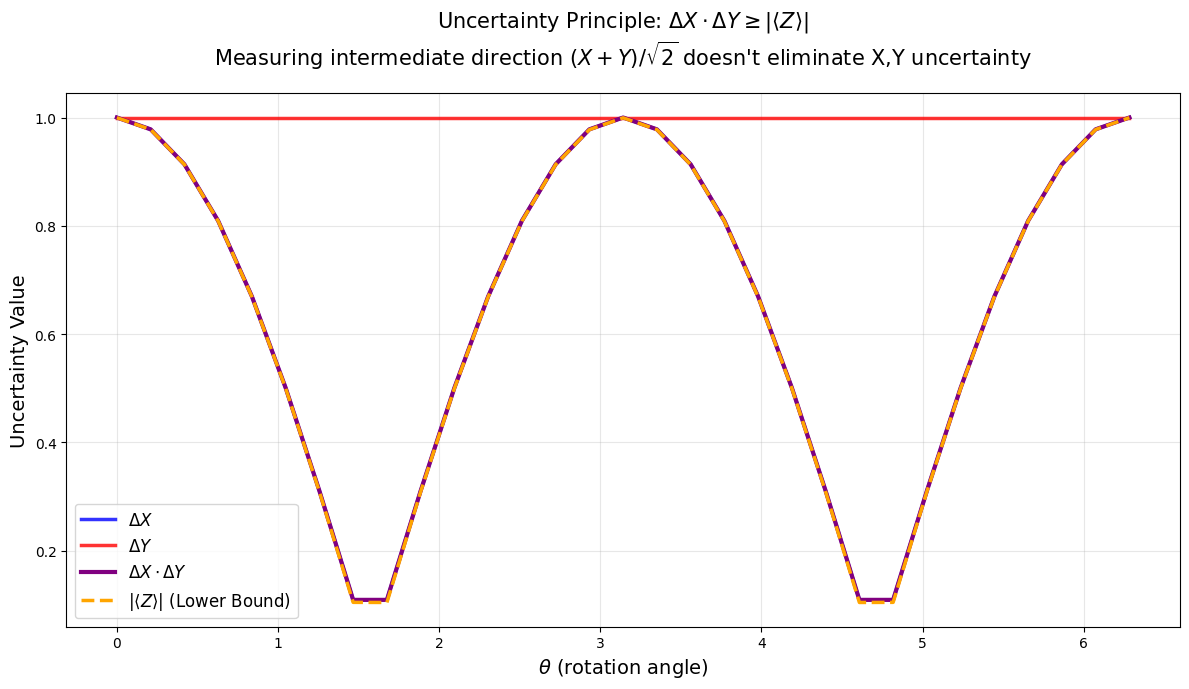

In [87]:
# Exploring measurements in intermediate directions
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
import numpy as np

# Step 1: Define observables
obs_x = SparsePauliOp("X")
obs_y = SparsePauliOp("Y")
obs_z = SparsePauliOp("Z")

# Observable halfway between X and Y: (X + Y)/√2
obs_intermediate = (obs_x + obs_y) / np.sqrt(2)

# Define registers
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

# Rotate away from |0> using RY to explore different states
theta = Parameter("θ")
qc.ry(theta, 0)
params = np.linspace(0, 2*np.pi, num=31)

# Step 2: Transpile the circuit
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)
obs_x_isa = obs_x.apply_layout(layout=qc_isa.layout)
obs_y_isa = obs_y.apply_layout(layout=qc_isa.layout)
obs_z_isa = obs_z.apply_layout(layout=qc_isa.layout)
obs_int_isa = obs_intermediate.apply_layout(layout=qc_isa.layout)

# Step 3: Run the job
job = noisy_estimator.run([(qc_isa, [[obs_x_isa], [obs_y_isa], [obs_z_isa], [obs_int_isa]], [params])])
res = job.result()

# Step 4: Post-processing and classical analysis
xs = res[0].data.evs[0]
ys = res[0].data.evs[1]
zs = abs(res[0].data.evs[2])

# Calculate uncertainties
delx = []
dely = []
prodxy = []
uncertainty_bound = []

for i in range(len(xs)):
    delx.append(np.sqrt(abs(1 - xs[i]**2)))
    dely.append(np.sqrt(abs(1 - ys[i]**2)))
    prodxy.append(delx[i] * dely[i])
    uncertainty_bound.append(zs[i])

# Single plot that tells the complete story
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(params, delx, 'b-', label=r"$\Delta X$", linewidth=2.5, alpha=0.8)
plt.plot(params, dely, 'r-', label=r"$\Delta Y$", linewidth=2.5, alpha=0.8)
plt.plot(params, prodxy, 'purple', label=r"$\Delta X \cdot \Delta Y$", linewidth=3)
plt.plot(params, uncertainty_bound, 'orange', label=r"$|\langle Z \rangle|$ (Lower Bound)", linewidth=2.5, linestyle='--')

plt.xlabel(r"$\theta$ (rotation angle)", fontsize=14)
plt.ylabel("Uncertainty Value", fontsize=14)
plt.title(r"Uncertainty Principle: $\Delta X \cdot \Delta Y \geq |\langle Z \rangle|$" + "\n" + 
          r"Measuring intermediate direction $(X+Y)/\sqrt{2}$ doesn't eliminate X,Y uncertainty", 
          fontsize=15, pad=20)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()